In [76]:
%%capture

import pylab
import numpy as np
%matplotlib inline
rates = np.arange(250, 400)
ff_weights = []
lat_weights = []
# STDP
a_plus = 0.1
b = 1.2
tau_plus = 20.  # ms
tau_minus = 64.  # ms
a_minus = (a_plus * tau_plus * b) / tau_minus
# Membrane
v_rest = -70  # mV
e_ext = 0  # V
v_thr = -54  # mV
g_max = 0.2
tau_m = 20  # ms
tau_ex = 5  # ms
for rate in rates:
    from spynnaker.pyNN.models.neural_properties.synapse_dynamics.synapse_dynamics import SynapseDynamics

    try:
        import pyNN.spiNNaker as p
    except Exception as e:
        import spynnaker7.pyNN as p


    p.setup(timestep=1.0, min_delay=1.0, max_delay=2)
    nNeurons = 1  # number of neurons in each population
    simtime = 1000
    t_record = 50


    cell_params = {'cm': 20.0,  # nF
               'i_offset': 0.0,
               'tau_m': 20.0,
               'tau_refrac': 0.5,
               'tau_syn_E': 5.0,
               'tau_syn_I': 5.0,
               'v_reset': -70.0,
               'v_rest': -70.0,
               'v_thresh': -50.0,
               'e_rev_E': 0.,
               'e_rev_I': -80.
               }

    populations = list()
    projections = list()

    weight_to_spike = g_max
    delay = 1

#     spikeArray = {'spike_times': np.linspace(0, simtime, rate)}
    target_pop = p.Population(nNeurons, p.IF_cond_exp, cell_params,
                       label='target_pop')
    source_pop= p.Population(1, p.SpikeSourcePoisson,
                                {'rate': rate,
                                 'start': 0,
                                 'duration': simtime
                                 }, label="Poisson spike source")

    stdp_model = p.STDPMechanism(
    timing_dependence=p.SpikePairRule(tau_plus=tau_plus,
                                        tau_minus=tau_minus),
    weight_dependence=p.AdditiveWeightDependence(w_min=0, w_max=2*g_max,
                                                   A_plus=a_plus,
                                                   A_minus=a_minus)
)

#     lat_projection= p.Projection(target_pop, target_pop, p.OneToOneConnector(weight_to_spike, delay),
#                                    synapse_dynamics=p.SynapseDynamics(slow=stdp_model))
    ff_projection = p.Projection(source_pop, target_pop, p.OneToOneConnector(weight_to_spike, delay),
                                   synapse_dynamics=p.SynapseDynamics(slow=stdp_model))
    pre_weights = []
    post_weights = []

    for run in range(simtime//t_record):
        p.run(t_record)
        pre_weights.append(np.array(ff_projection._get_synaptic_data(False, 'weight')))
#         post_weights.append(np.array(lat_projection._get_synaptic_data(False, 'weight')))

    p.end()
    ff_weights.append(np.asarray(pre_weights).ravel())
#     lat_weights.append(np.asarray(post_weights).ravel())
    lat_weights.append([])

In [77]:
# if spikes is not None:
# #     print spikes
#     pylab.figure()
#     pylab.plot([i[1] for i in spikes], [i[0] for i in spikes], ".")
#     pylab.xlabel('Time/ms')
#     pylab.ylabel('spikes')
#     pylab.title('spikes')
#     pylab.show()
# else:
#     print "No spikes received"

# # Make some graphs

# if v is not None:
#     ticks = len(v) / nNeurons
#     pylab.figure()
#     pylab.xlabel('Time/ms')
#     pylab.ylabel('v')
#     pylab.title('v')
#     for pos in range(0, nNeurons, 20):
#         v_for_neuron = v[pos * ticks: (pos + 1) * ticks]
#         pylab.plot([i[2] for i in v_for_neuron])
#     pylab.show()

# if gsyn is not None:
#     ticks = len(gsyn) / nNeurons
#     pylab.figure()
#     pylab.xlabel('Time/ms')
#     pylab.ylabel('gsyn')
#     pylab.title('gsyn')
#     for pos in range(0, nNeurons, 20):
#         gsyn_for_neuron = gsyn[pos * ticks: (pos + 1) * ticks]
#         pylab.plot([i[2] for i in gsyn_for_neuron])
#     pylab.show()

In [415]:
len(ff_weights)

150

In [79]:
ff_weights = np.asarray(ff_weights)
lat_weights = np.asarray(lat_weights)

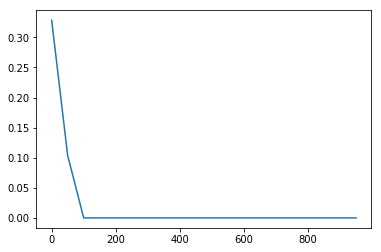

In [81]:
f = pylab.figure()
pylab.plot(np.arange(ff_weights.shape[-1]) * t_record, ff_weights[-1,:])
# pylab.plot(np.arange(ff_weights.shape[-1]) * t_record, lat_weights[-1,:])

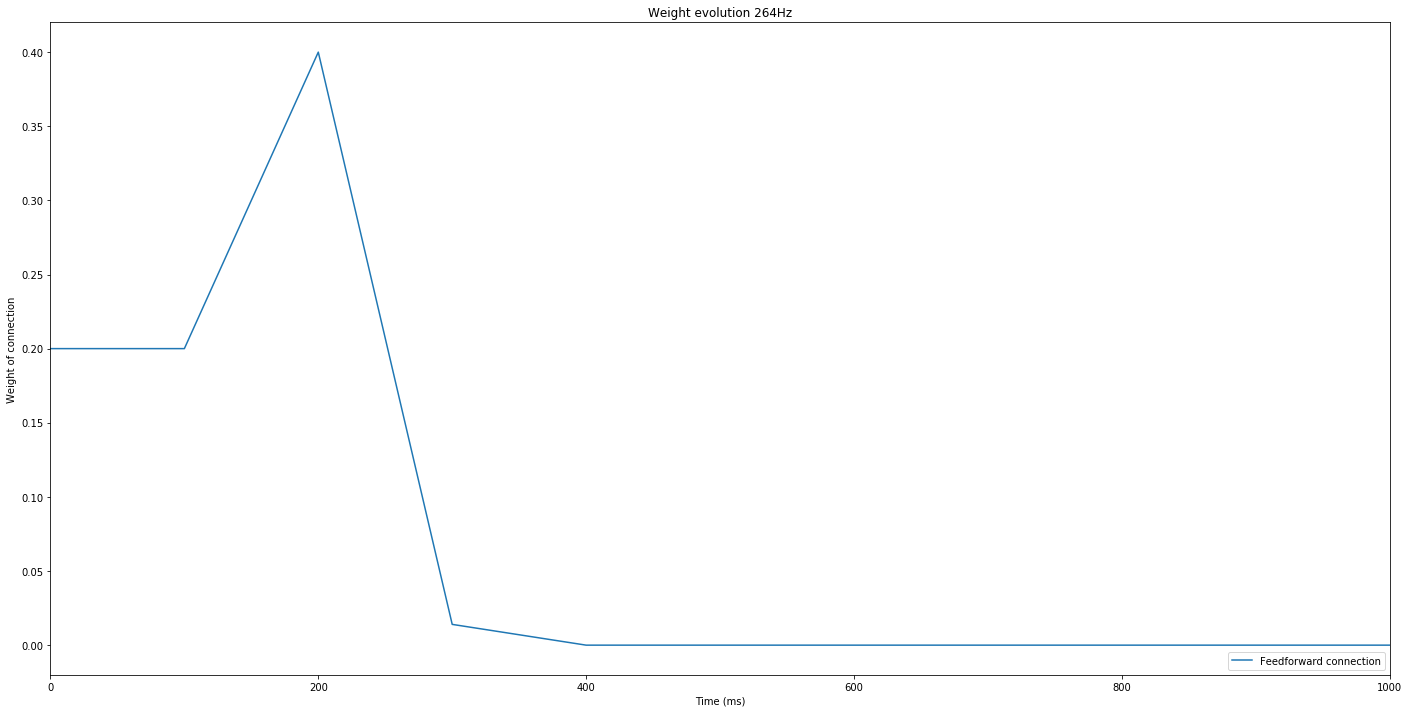

In [426]:
f, ax1 = pylab.subplots(1, 1, figsize=(24, 12))
ax1.set_xlim((0, 1000))
ax1.plot(np.arange(ff_weights.shape[-1]) * t_record, ff_weights[15, :], label="Feedforward connection")
# ax1.plot(np.arange(ff_weights.shape[-1]) * t_record, lat_weights[-1, :])
ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("Weight of connection")
ax1.legend(loc='lower right')
ax1.set_title("Weight evolution %3s" % str(250 + 15 - 1) + 'Hz')

In [83]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
%matplotlib inline
plt.viridis()
from matplotlib import animation, rc
from IPython.display import HTML

(0, 1000)

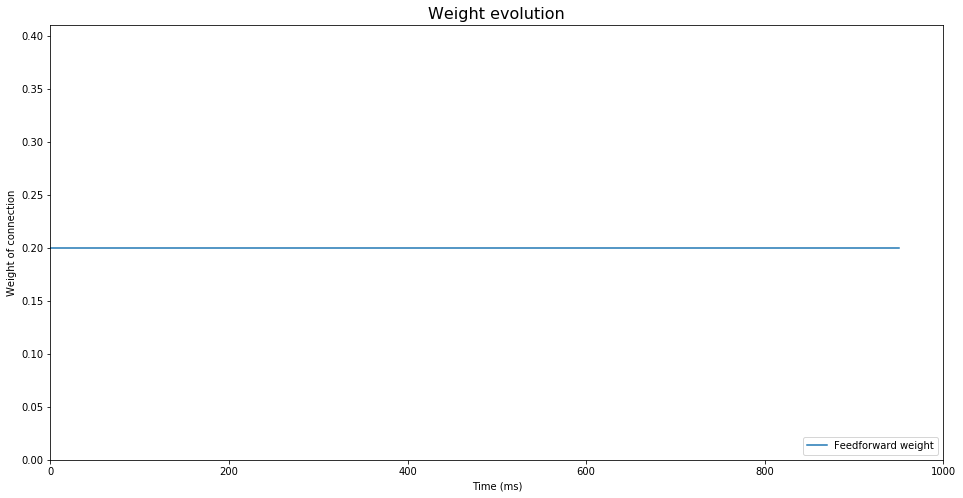

In [87]:
# synaptic capacity animation 
f_capacity, (ax1_capacity) = plt.subplots(1, 1 ,figsize=(16, 8))
capacity_1,  = ax1_capacity.plot(np.arange(ff_weights.shape[-1]) * t_record, ff_weights[0, :], label='Feedforward weight')
# capacity_2, = ax1_capacity.plot(np.arange(ff_weights.shape[-1]) * t_record, lat_weights[0, :], label='Recurrent weight')
ax1_capacity.grid(visible=False)
title_ax = ax1_capacity.set_title("Weight evolution", fontsize=16)
ax1_capacity.legend(loc='lower right')
ax1_capacity.set_xlabel("Time (ms)")
ax1_capacity.set_ylabel("Weight of connection")
ax1_capacity.set_ylim([0,.41])
ax1_capacity.set_xlim([0, simtime])

In [88]:
def init_capacity():
#     line.set_data(input_rates/Hz)
#     ff_conn_ax.set_data(np.zeros((16,16)))
#     return (capacity_1, capacity_2, title_ax,)
    return (capacity_1, title_ax,)

def animate_capacity(i):
    global ff_weights, lat_weights, rates
#     ax1_capacity.cla()
    capacity_1.set_data(np.arange(simtime//t_record) * t_record, ff_weights[i, :])
#     capacity_2.set_data(np.arange(simtime//t_record) * t_record, lat_weights[i, :])
    title_ax.set_text("Weight evolution %3s" % str(rates[i]) + 'Hz')
#     ax1_capacity.axhline(y=s_max, xmin=0, xmax=ff_last.shape[1], c='r', label='$Maximum combined synaptic capacity$')
#     return (capacity_1, capacity_2, title_ax)
    return (capacity_1, title_ax,)

In [89]:
anim_capacity = animation.FuncAnimation(f_capacity, animate_capacity, init_func=init_capacity,
                               frames= rates.size, 
                            interval=200, blit=True)

In [90]:
HTML(anim_capacity.to_html5_video())

In [92]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=5, metadata=dict(artist='Petrut A Bogdan'), bitrate=-1)
anim_capacity.save('weight_evo_only_ff_500Hz.mp4', writer=writer)

In [93]:
np.savez("weight_evo_only_ff_500Hz", ff_weights=ff_weights, lat_weights=lat_weights, rates=rates)

# Single experiment -- equally spaced spikes

In [140]:
from brian2.units import *

c:\python27\lib\site-packages\Cython\Distutils\old_build_ext.py:30: UserWarning: Cython.Distutils.old_build_ext does not properly handle dependencies and is deprecated.
  "Cython.Distutils.old_build_ext does not properly handle dependencies "


In [175]:
def plot_spikes(spikes, title):
    if spikes is not None:
        f, ax1 = plt.subplots(1, 1, figsize=(24, 12))
        ax1.set_xlim((0, simtime))
        ax1.scatter([i[1] for i in spikes], [i[0] for i in spikes],s=100, marker=".")
        ax1.set_xlabel('Time/ms')
        ax1.set_ylabel('spikes')
        ax1.set_title(title)

In [394]:
%%capture
import pylab
import numpy as np
# import spynnaker_extra_pynn_models as extra_sim
%matplotlib inline
from spynnaker.pyNN.models.neural_properties.synapse_dynamics.synapse_dynamics import SynapseDynamics

try:
    import pyNN.spiNNaker as p
except Exception as e:
    import spynnaker7.pyNN as p


p.setup(timestep=.1, min_delay=1.0, max_delay=2)
nNeurons = 1  # number of neurons in each population
simtime = 1000
t_record = 20


cell_params_lif = {'cm': 2.5,
                   'i_offset': 0.0,
                   'tau_m': 20.0,
                   'tau_refrac': 5.0,
                   'tau_syn_E': 5.0,
                   'tau_syn_I': 5.0,
                   'v_reset': -70.0,
                   'v_rest': -65.0,
                   'v_thresh': -50.0
                   }

weight_to_spike = .1
delay = 1

spikeArray = {'spike_times': [10, 20, 30, 100, 110, 120, 200, 210, 220, 300, 310, 320, 400, 410, 420, 
                             500, 510, 520, 600, 610, 620, 700, 710, 720, 800, 810, 820, 900, 910, 920]}#np.linspace(10, simtime, 20)}



target_pop = p.Population(nNeurons, p.IF_cond_exp, cell_params_lif,
                   label='target_pop')
source_pop= p.Population(1, p.SpikeSourceArray,
                            spikeArray, label="spike source")
# stdp_model2 = p.STDPMechanism(
#             timing_dependence=extra_sim.PfisterSpikeTriplet(
#                 tau_plus=16.8, tau_minus=33.7, tau_x=101, tau_y=114),
#             weight_dependence=extra_sim.WeightDependenceAdditiveTriplet(
#                 w_min=0.0, w_max=1.0, A_plus=param_scale * 0.0,
#                 A_minus=param_scale * 7.1e-3,
#                 A3_plus=param_scale * 6.5e-3, A3_minus=param_scale * 0.0)
#         )

stdp_model = p.STDPMechanism(
timing_dependence=p.SpikePairRule(),
weight_dependence=p.AdditiveWeightDependence(w_min=0, w_max=1)
)

lat_projection= p.Projection(target_pop, target_pop, p.OneToOneConnector(weight_to_spike, delay),
                                   synapse_dynamics=p.SynapseDynamics(slow=stdp_model))
ff_projection = p.Projection(source_pop, target_pop, p.OneToOneConnector(weight_to_spike, delay),
                               synapse_dynamics=p.SynapseDynamics(slow=stdp_model))
pre_weights = []
post_weights = []

target_pop.record_v()
target_pop.record() #Spikes

for run in range(simtime//t_record):
    p.run(t_record)
    pre_weights.append(np.array(ff_projection._get_synaptic_data(False, 'weight')))
    post_weights.append(np.array(lat_projection._get_synaptic_data(False, 'weight')))

v = target_pop.get_v(compatible_output=True)
spikes = target_pop.getSpikes(compatible_output=True)
p.end()
pre_weights=np.asarray(pre_weights).ravel()
post_weight=np.asarray(post_weights).ravel()

NotImplementedError: STDP LUT generation currently only supports 1ms timesteps

In [ ]:
f, ax1 = pylab.subplots(1, 1, figsize=(24, 12))
ax1.set_xlim((0, simtime))
ax1.set_ylim([0, .25])
for time in [i[1] for i in spikes]:
    plt.axvline(time, c='r',ls=':', lw=2)
for time in spikeArray['spike_times']:
    plt.axvline(time, c='g', ls=':', lw=1)
ax1.plot(np.arange(pre_weights.shape[-1]) * t_record, pre_weights, label='Feedforward weight')
ax1.plot(np.arange(post_weight.shape[-1]) * t_record, post_weight, label='Lateral weight')

ax1.legend(loc='lower right')
ax1.set_xlabel('Time/ms')
ax1.set_ylabel('g_syn')
ax1.set_title("Weight evolution")

In [ ]:
plot_spikes(spikes, "Postsynaptic spikes")

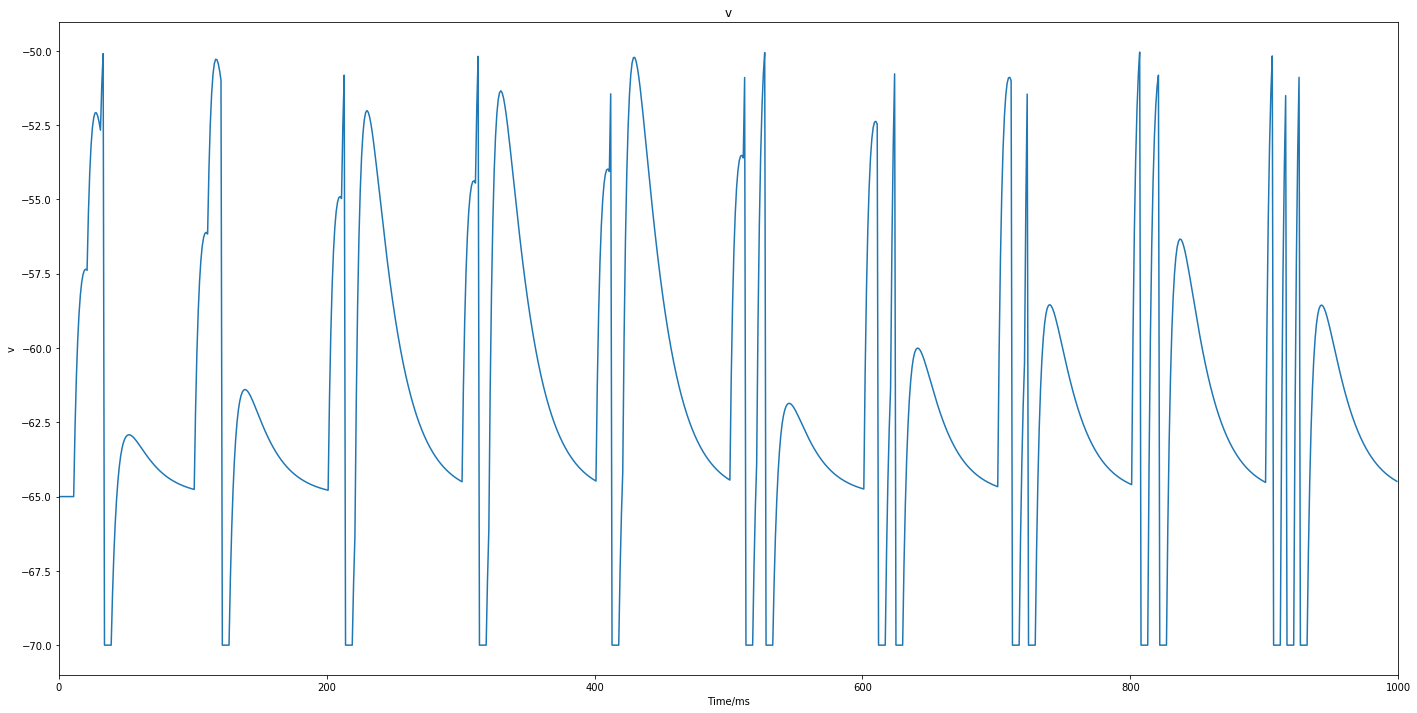

In [259]:
if v is not None:
    ticks = len(v) / nNeurons
    f, ax1 = plt.subplots(1, 1, figsize=(24, 12))
    ax1.set_xlim((0, simtime))
    
    for pos in range(0, nNeurons, 20):
        v_for_neuron = v[pos * ticks: (pos + 1) * ticks]
        ax1.plot([i[2] for i in v_for_neuron])
    ax1.set_xlabel('Time/ms')
    ax1.set_ylabel('v')
    ax1.set_title('v')

In [260]:
print "Post neuron firing rate = ", spikes.shape[0]/(simtime*ms)
print "Max theoretical firing rate = ", 1/(5.0*ms)

Post neuron firing rate =  16. Hz
Max theoretical firing rate =  200. Hz


In [407]:
%%capture
import pylab
import numpy as np
# import spynnaker_extra_pynn_models as extra_sim
%matplotlib inline
from spynnaker.pyNN.models.neural_properties.synapse_dynamics.synapse_dynamics import SynapseDynamics

try:
    import pyNN.spiNNaker as p
except Exception as e:
    import spynnaker7.pyNN as p


p.setup(timestep=1.0, min_delay=1.0, max_delay=2)
nNeurons = 16  # number of neurons in each population
simtime = 60000
t_record = 100

a_plus = 0.1
b = 1.2
tau_plus = 20.  # ms
tau_minus = 64.  # ms
a_minus = (a_plus * tau_plus * b) / tau_minus
cell_params_lif = {'cm': 20,
                   'i_offset': 0.0,
                   'tau_m': 20.0,
                   'tau_refrac': 5.0,
                   'tau_syn_E': 5.0,
                   'tau_syn_I': 5.0,
                   'v_reset': -70.0,
                   'v_rest': -65.0,
                   'v_thresh': -50.0
                   }

cell_params = {'cm': 20.0,  # nF
               'i_offset': 0.0,
               'tau_m': 20.0,
               'tau_refrac': 5.0,
               'tau_syn_E': 5.0,
               'tau_syn_I': 5.0,
               'v_reset': -70.0,
               'v_rest': -70.0,
               'v_thresh': -50.0,
               'e_rev_E': 0.,
               'e_rev_I': -80.
               }

weight_to_spike = .2
delay = 1

# spikeArray = {'spike_times': [10, 20, 30, 100, 110, 120, 200, 210, 220, 300, 310, 320, 400, 410, 420, 
#                              500, 510, 520, 600, 610, 620, 700, 710, 720, 800, 810, 820, 900, 910, 920]}#np.linspace(10, simtime, 25)}


rates = np.asarray([[20]]*nNeurons)
target_pop = p.Population(1, p.IF_cond_exp, cell_params,
                   label='target_pop')
source_pop= p.Population(nNeurons, p.SpikeSourcePoisson,
                            {'rate':rates.ravel(),
                                 'start': 0,
                                 'duration': simtime
                                 }, label="spike source")
# stdp_model2 = p.STDPMechanism(
#             timing_dependence=extra_sim.PfisterSpikeTriplet(
#                 tau_plus=16.8, tau_minus=33.7, tau_x=101, tau_y=114),
#             weight_dependence=extra_sim.WeightDependenceAdditiveTriplet(
#                 w_min=0.0, w_max=1.0, A_plus=param_scale * 0.0,
#                 A_minus=param_scale * 7.1e-3,
#                 A3_plus=param_scale * 6.5e-3, A3_minus=param_scale * 0.0)
#         )

stdp_model = p.STDPMechanism(
timing_dependence=p.SpikePairRule(tau_plus=tau_plus,
                                        tau_minus=tau_minus),
weight_dependence=p.AdditiveWeightDependence(w_min=0, w_max=.2, A_plus=a_plus,
                                                   A_minus=a_minus)
)

lat_projection= p.Projection(target_pop, target_pop, p.OneToOneConnector(weight_to_spike, delay),
                                   synapse_dynamics=p.SynapseDynamics(slow=stdp_model))
ff_projection = p.Projection(source_pop, target_pop, p.AllToAllConnector(weight_to_spike, delay),
                               synapse_dynamics=p.SynapseDynamics(slow=stdp_model))
pre_weights = []
post_weights = []

# target_pop.record_v()
source_pop.record()
target_pop.record() #Spikes
target_pop.record_v()
target_pop.record_gsyn()

for run in range(simtime//t_record):
    p.run(t_record)
    pre_weights.append(np.array(ff_projection._get_synaptic_data(False, 'weight')))
    post_weights.append(np.array(lat_projection._get_synaptic_data(False, 'weight')))

# v = target_pop.get_v(compatible_output=True)
spikes = target_pop.getSpikes(compatible_output=True)
source_spikes = source_pop.getSpikes(compatible_output=True)
target_v = target_pop.get_v(compatible_output=True)
target_gsyn = target_pop.get_gsyn(compatible_output=True)
p.end()
pre_weights=np.asarray(pre_weights)
post_weight=np.asarray(post_weights)



In [408]:
pre_weights=pre_weights.reshape(pre_weights.shape[0], nNeurons)

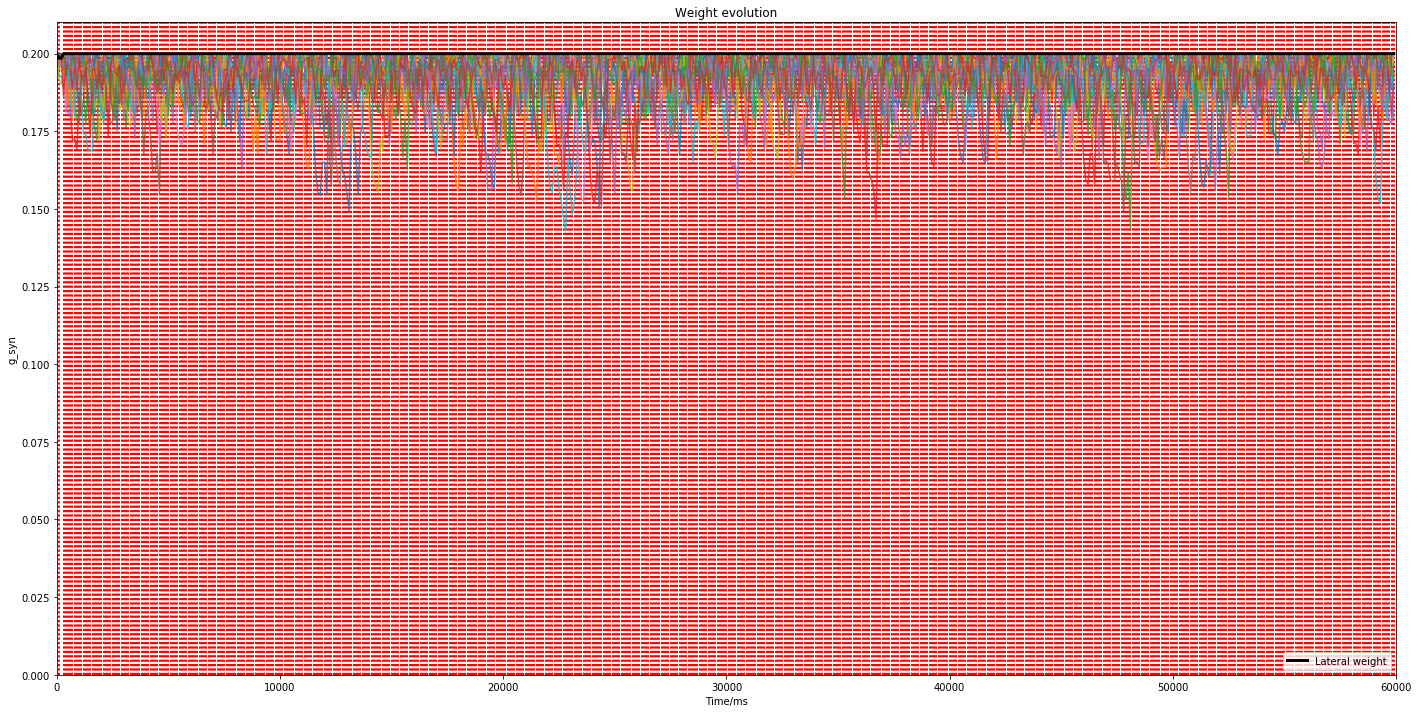

In [409]:
f, ax1 = pylab.subplots(1, 1, figsize=(24, 12))
ax1.set_xlim((0, simtime))
ax1.set_ylim([0, .21])
for time in [i[1] for i in spikes]:
    plt.axvline(time, c='r',ls=':', lw=2)
# for time in [i[1] for i in source_spikes]:
#     plt.axvline(time, c='g', ls=':', lw=1)
for i in range(nNeurons):
    ax1.plot(np.arange(pre_weights.shape[0]) * t_record, pre_weights[:,i].flatten(), alpha=.8)

ax1.plot(np.arange(post_weight.shape[0]) * t_record, post_weight.ravel(), label='Lateral weight', c='k', lw=3)
ax1.legend(loc='lower right')
ax1.set_xlabel('Time/ms')
ax1.set_ylabel('g_syn')
ax1.set_title("Weight evolution")

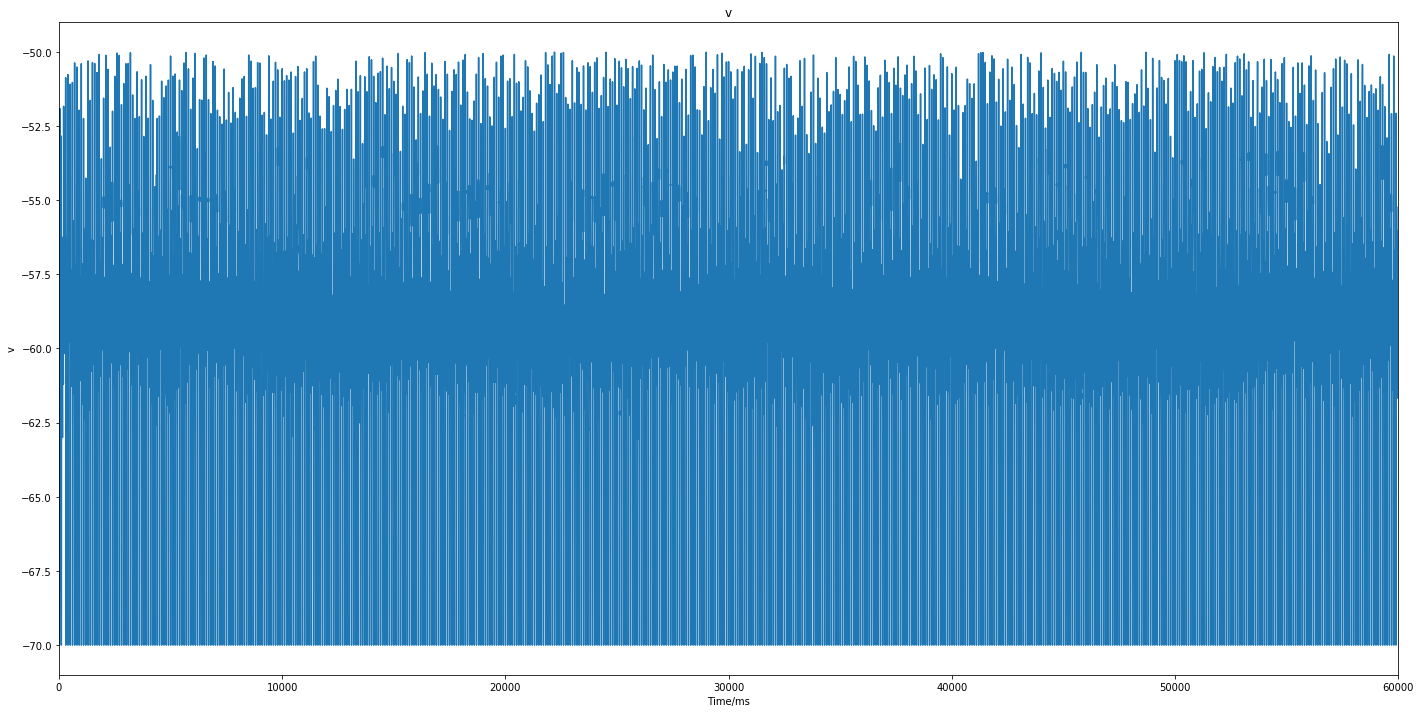

In [410]:

ticks = len(v) / nNeurons
f, ax1 = plt.subplots(1, 1, figsize=(24, 12))
ax1.set_xlim((0, simtime))

#     v_for_neuron = target_v[ticks: 1 * ticks]
ax1.plot([i[2] for i in target_v])
ax1.set_xlabel('Time/ms')
ax1.set_ylabel('v')
ax1.set_title('v')

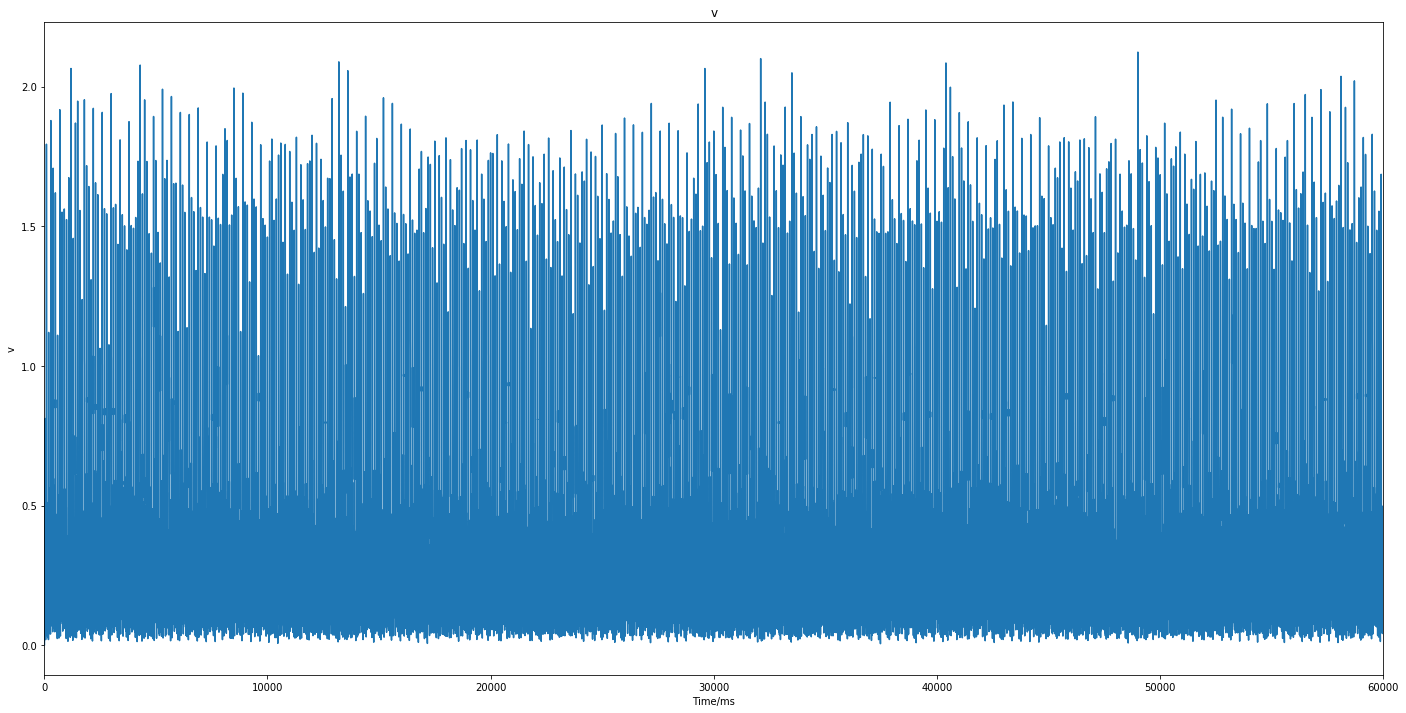

In [411]:

ticks = len(v) / nNeurons
f, ax1 = plt.subplots(1, 1, figsize=(24, 12))
ax1.set_xlim((0, simtime))

#     v_for_neuron = target_v[ticks: 1 * ticks]
ax1.plot([i[2] for i in target_gsyn])
ax1.set_xlabel('Time/ms')
ax1.set_ylabel('v')
ax1.set_title('v')

In [21]:
%%capture
import pylab
import numpy as np
# import spynnaker_extra_pynn_models as extra_sim
%matplotlib inline
from spynnaker.pyNN.models.neural_properties.synapse_dynamics.synapse_dynamics import SynapseDynamics

try:
    import pyNN.spiNNaker as p
except Exception as e:
    import spynnaker7.pyNN as p


p.setup(timestep=1., min_delay=1.0, max_delay=2)
nNeurons = 1  # number of neurons in each population
simtime = 220
t_record = 10


cell_params_lif = {'cm': 2.5,
                   'i_offset': 0.0,
                   'tau_m': 20.0,
                   'tau_refrac': 5.0,
                   'tau_syn_E': 5.0,
                   'tau_syn_I': 5.0,
                   'v_reset': -70.0,
                   'v_rest': -65.0,
                   'v_thresh': -50.0
                   }

weight_to_spike = .1
delay = 1
st = [10, 20, 30, 40, 50, 52, 70, 72, 80, 82, 90, 92, 100, 101, 102, 103, 104, 105, 110, 120, 130, 150, 155, 160, 175, 180, 185, 190, 195]
spikeArray = {'spike_times': st}#np.linspace(10, simtime, 20)}



target_pop = p.Population(nNeurons, p.IF_cond_exp, cell_params_lif,
                   label='target_pop')
source_pop= p.Population(1, p.SpikeSourceArray,
                            spikeArray, label="spike source")
# stdp_model2 = p.STDPMechanism(
#             timing_dependence=extra_sim.PfisterSpikeTriplet(
#                 tau_plus=16.8, tau_minus=33.7, tau_x=101, tau_y=114),
#             weight_dependence=extra_sim.WeightDependenceAdditiveTriplet(
#                 w_min=0.0, w_max=1.0, A_plus=param_scale * 0.0,
#                 A_minus=param_scale * 7.1e-3,
#                 A3_plus=param_scale * 6.5e-3, A3_minus=param_scale * 0.0)
#         )

stdp_model = p.STDPMechanism(
timing_dependence=p.SpikePairRule(),
weight_dependence=p.AdditiveWeightDependence(w_min=0, w_max=2)
)

lat_projection= p.Projection(target_pop, target_pop, p.OneToOneConnector(weight_to_spike, delay),
                                   synapse_dynamics=p.SynapseDynamics(slow=stdp_model))
ff_projection = p.Projection(source_pop, target_pop, p.OneToOneConnector(weight_to_spike, delay),
                               synapse_dynamics=p.SynapseDynamics(slow=stdp_model))
pre_weights = []
post_weights = []

target_pop.record_v()
target_pop.record() #Spikes

for run in range(simtime//t_record):
    p.run(t_record)
    pre_weights.append(np.array(ff_projection._get_synaptic_data(False, 'weight')))
    post_weights.append(np.array(lat_projection._get_synaptic_data(False, 'weight')))

v = target_pop.get_v(compatible_output=True)
spikes = target_pop.getSpikes(compatible_output=True)
p.end()
pre_weights=np.asarray(pre_weights).ravel()
post_weight=np.asarray(post_weights).ravel()

In [22]:
pre_weights

array([ 0.10009766,  0.10009766,  0.10009766,  0.10009766,  0.11767578,
        0.1015625 ,  0.1015625 ,  0.13500977,  0.14477539,  0.15429688,
        0.1574707 ,  0.27416992,  0.35693359,  0.32666016,  0.32666016,
        0.39404297,  0.39794922,  0.40991211,  0.40771484,  0.38378906,
        0.38378906,  0.38378906])

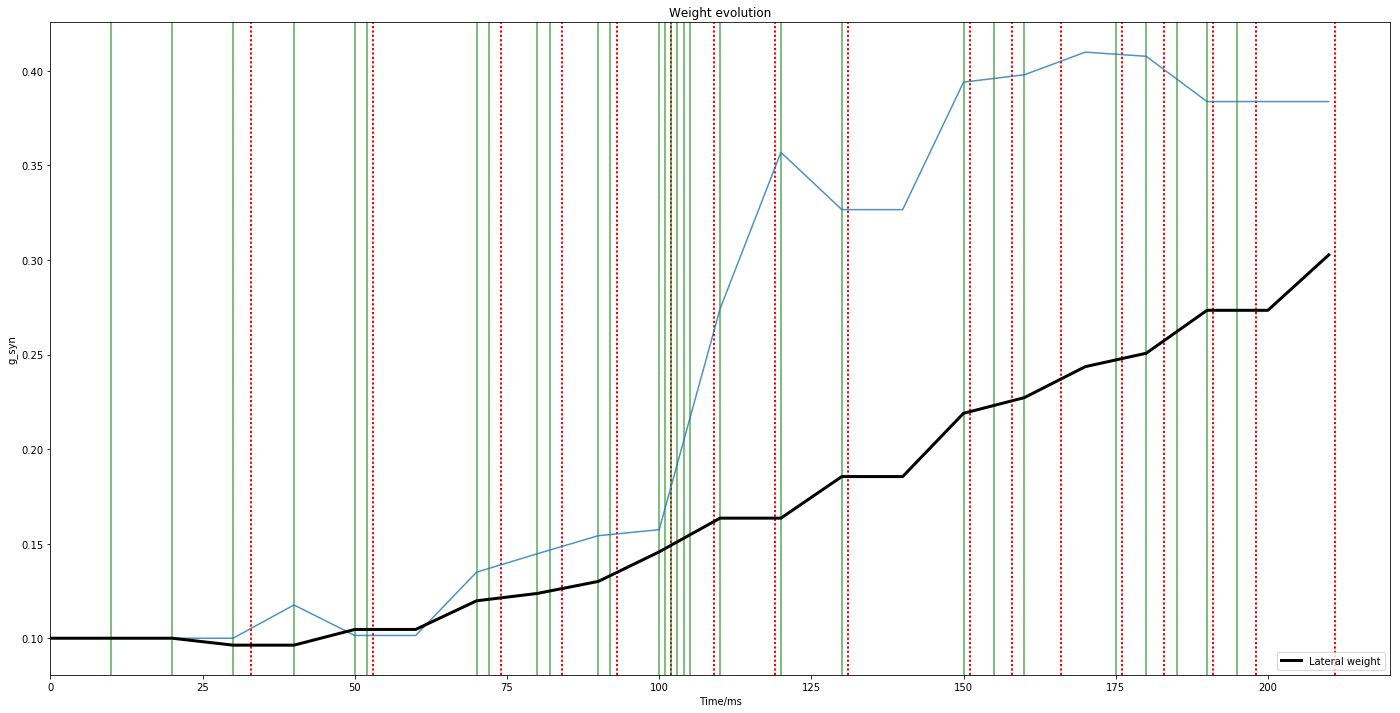

In [23]:
f, ax1 = pylab.subplots(1, 1, figsize=(24, 12))
ax1.set_xlim((0, simtime))
# ax1.set_ylim([0, .21])
for time in [i[1] for i in spikes]:
    pylab.axvline(time, c='r',ls=':', lw=2)
for time in st:
    pylab.axvline(time, c='g',ls='-', lw=2, alpha=.5)
# for time in [i[1] for i in source_spikes]:
#     plt.axvline(time, c='g', ls=':', lw=1)
for i in range(nNeurons):
    ax1.plot(np.arange(pre_weights.shape[0]) * t_record, pre_weights.flatten(), alpha=.8)

ax1.plot(np.arange(post_weight.shape[0]) * t_record, post_weight.ravel(), label='Lateral weight', c='k', lw=3)
ax1.legend(loc='lower right')
ax1.set_xlabel('Time/ms')
ax1.set_ylabel('g_syn')
ax1.set_title("Weight evolution")

In [34]:
%%capture
import pylab
import numpy as np
# import spynnaker_extra_pynn_models as extra_sim
%matplotlib inline
from spynnaker.pyNN.models.neural_properties.synapse_dynamics.synapse_dynamics import SynapseDynamics

try:
    import pyNN.spiNNaker as p
except Exception as e:
    import spynnaker7.pyNN as p


p.setup(timestep=1., min_delay=1.0, max_delay=2)
nNeurons = 1  # number of neurons in each population
simtime = 330
t_record = 10


cell_params_lif = {'cm': 2.5,
                   'i_offset': 0.0,
                   'tau_m': 20.0,
                   'tau_refrac': 5.0,
                   'tau_syn_E': 5.0,
                   'tau_syn_I': 5.0,
                   'v_reset': -70.0,
                   'v_rest': -65.0,
                   'v_thresh': -50.0
                   }

weight_to_spike = .1
delay = 1
st = [10, 11, 12, 13, 14, 15, 20, 50, 51, 52, 53, 54, 55, 56, 60, 70, 80, 90, 100, 110, 120, 130, 140,
     150,160,170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]
spikeArray = {'spike_times': st}#np.linspace(10, simtime, 20)}



target_pop = p.Population(nNeurons, p.IF_cond_exp, cell_params_lif,
                   label='target_pop')
source_pop= p.Population(1, p.SpikeSourceArray,
                            spikeArray, label="spike source")
# stdp_model2 = p.STDPMechanism(
#             timing_dependence=extra_sim.PfisterSpikeTriplet(
#                 tau_plus=16.8, tau_minus=33.7, tau_x=101, tau_y=114),
#             weight_dependence=extra_sim.WeightDependenceAdditiveTriplet(
#                 w_min=0.0, w_max=1.0, A_plus=param_scale * 0.0,
#                 A_minus=param_scale * 7.1e-3,
#                 A3_plus=param_scale * 6.5e-3, A3_minus=param_scale * 0.0)
#         )

stdp_model = p.STDPMechanism(
timing_dependence=p.SpikePairRule(),
weight_dependence=p.AdditiveWeightDependence(w_min=0, w_max=2)
)

lat_projection= p.Projection(target_pop, target_pop, p.OneToOneConnector(weight_to_spike, delay),
                                   synapse_dynamics=p.SynapseDynamics(slow=stdp_model))
ff_projection = p.Projection(source_pop, target_pop, p.OneToOneConnector(weight_to_spike, delay),
                               synapse_dynamics=p.SynapseDynamics(slow=stdp_model))
pre_weights = []
post_weights = []

target_pop.record_v()
target_pop.record() #Spikes

for run in range(simtime//t_record):
    p.run(t_record)
    pre_weights.append(np.array(ff_projection._get_synaptic_data(False, 'weight')))
    post_weights.append(np.array(lat_projection._get_synaptic_data(False, 'weight')))

v = target_pop.get_v(compatible_output=True)
spikes = target_pop.getSpikes(compatible_output=True)
p.end()
pre_weights=np.asarray(pre_weights).ravel()
post_weight=np.asarray(post_weights).ravel()

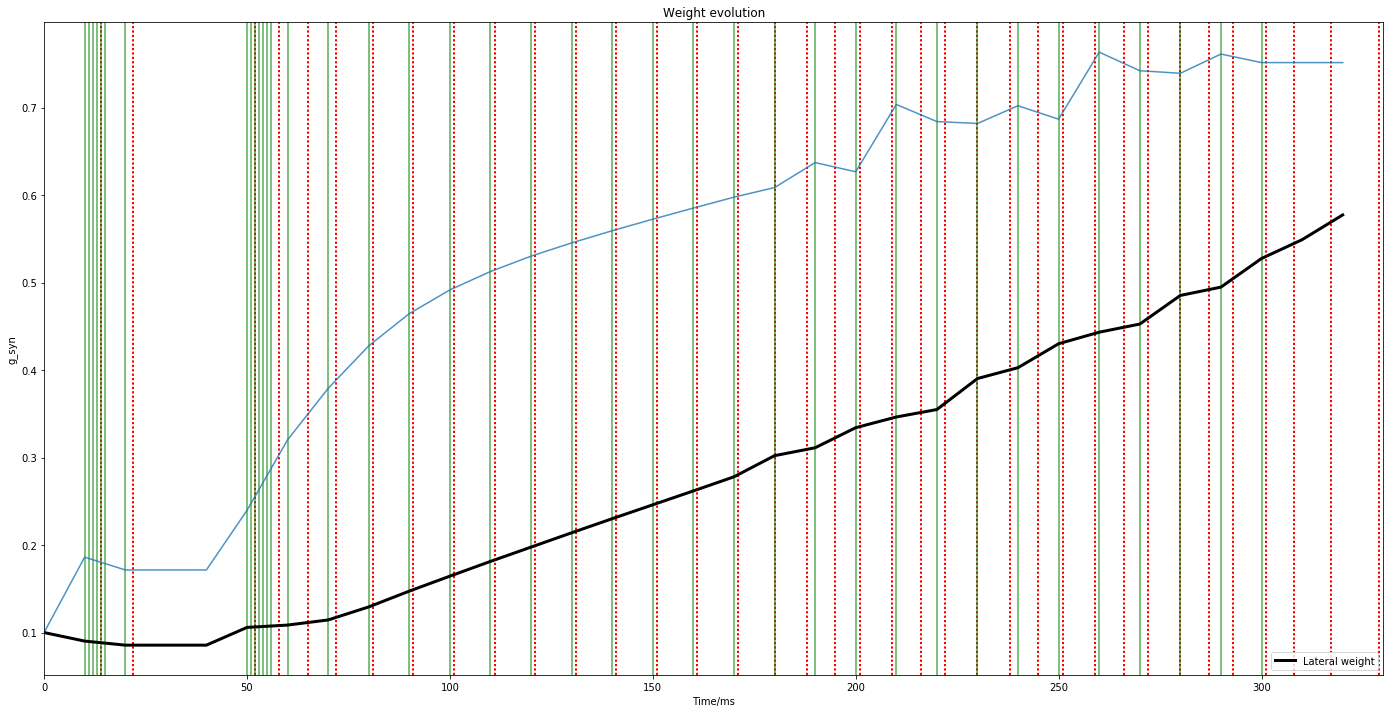

In [35]:
f, ax1 = pylab.subplots(1, 1, figsize=(24, 12))
ax1.set_xlim((0, simtime))
# ax1.set_ylim([0, .21])
for time in [i[1] for i in spikes]:
    pylab.axvline(time, c='r',ls=':', lw=2)
for time in st:
    pylab.axvline(time, c='g',ls='-', lw=2, alpha=.5)
# for time in [i[1] for i in source_spikes]:
#     plt.axvline(time, c='g', ls=':', lw=1)
for i in range(nNeurons):
    ax1.plot(np.arange(pre_weights.shape[0]) * t_record, pre_weights.flatten(), alpha=.8)

ax1.plot(np.arange(post_weight.shape[0]) * t_record, post_weight.ravel(), label='Lateral weight', c='k', lw=3)
ax1.legend(loc='lower right')
ax1.set_xlabel('Time/ms')
ax1.set_ylabel('g_syn')
ax1.set_title("Weight evolution")

In [62]:
%%capture
import pylab
import numpy as np
# import spynnaker_extra_pynn_models as extra_sim
%matplotlib inline
from spynnaker.pyNN.models.neural_properties.synapse_dynamics.synapse_dynamics import SynapseDynamics

try:
    import pyNN.spiNNaker as p
except Exception as e:
    import spynnaker7.pyNN as p


p.setup(timestep=1., min_delay=1.0, max_delay=2)
nNeurons = 1  # number of neurons in each population
simtime = 120
t_record = 10


cell_params_lif = {'cm': 2.5,
                   'i_offset': 0.0,
                   'tau_m': 20.0,
                   'tau_refrac': 5.0,
                   'tau_syn_E': 5.0,
                   'tau_syn_I': 5.0,
                   'v_reset': -70.0,
                   'v_rest': -65.0,
                   'v_thresh': -50.0
                   }

weight_to_spike = 2
delay = 1
# st = [10, 11, 12, 13, 14, 15, 20, 50, 51, 52, 53, 54, 55, 56, 60, 70, 80, 90, 100, 110, 120, 130, 140,
#      150,160,170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]
st = [10, 11, 12, 13, 14, 15, 20,21,22,23,24, 25, 50, 51, 52, 53, 54, 55, 56, 60, 65, 70, 75, 80, 90, 100]
spikeArray = {'spike_times': st}#np.linspace(10, simtime, 20)}



target_pop = p.Population(nNeurons, p.IF_curr_exp, cell_params_lif,
                   label='target_pop')
source_pop= p.Population(1, p.SpikeSourceArray,
                            spikeArray, label="spike source")
# stdp_model2 = p.STDPMechanism(
#             timing_dependence=extra_sim.PfisterSpikeTriplet(
#                 tau_plus=16.8, tau_minus=33.7, tau_x=101, tau_y=114),
#             weight_dependence=extra_sim.WeightDependenceAdditiveTriplet(
#                 w_min=0.0, w_max=1.0, A_plus=param_scale * 0.0,
#                 A_minus=param_scale * 7.1e-3,
#                 A3_plus=param_scale * 6.5e-3, A3_minus=param_scale * 0.0)
#         )

stdp_model = p.STDPMechanism(
timing_dependence=p.SpikePairRule(tau_minus=64, tau_plus=30),
weight_dependence=p.AdditiveWeightDependence(w_min=0, w_max=4, A_minus=.01, A_plus=.02)
)

lat_projection= p.Projection(target_pop, target_pop, p.OneToOneConnector(weight_to_spike, delay),
                                   synapse_dynamics=p.SynapseDynamics(slow=stdp_model))
ff_projection = p.Projection(source_pop, target_pop, p.OneToOneConnector(weight_to_spike, delay),
                               synapse_dynamics=p.SynapseDynamics(slow=stdp_model))
pre_weights = []
post_weights = []

target_pop.record_v()
target_pop.record() #Spikes

for run in range(simtime//t_record):
    p.run(t_record)
    pre_weights.append(np.array(ff_projection._get_synaptic_data(False, 'weight')))
    post_weights.append(np.array(lat_projection._get_synaptic_data(False, 'weight')))

v = target_pop.get_v(compatible_output=True)
spikes = target_pop.getSpikes(compatible_output=True)
p.end()
pre_weights=np.asarray(pre_weights).ravel()
post_weight=np.asarray(post_weights).ravel()

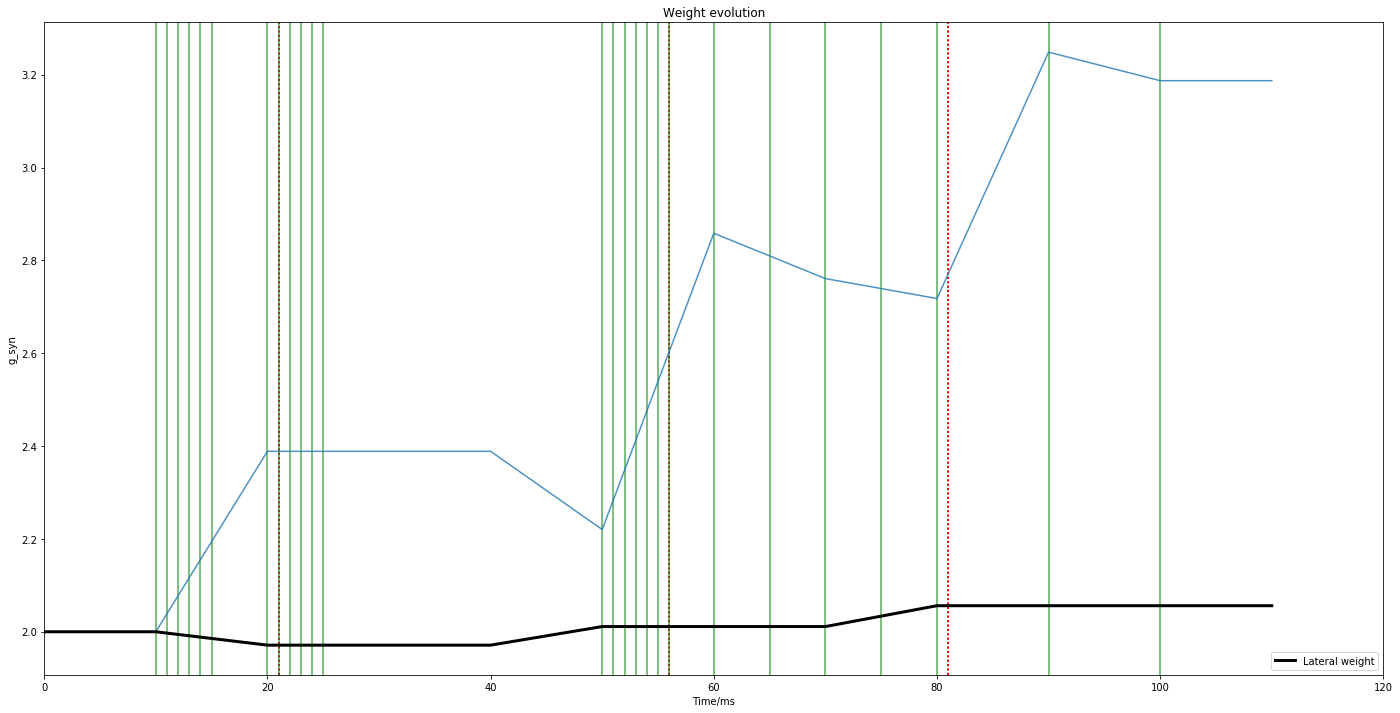

In [63]:
f, ax1 = pylab.subplots(1, 1, figsize=(24, 12))
ax1.set_xlim((0, simtime))
# ax1.set_ylim([0, .21])
for time in [i[1] for i in spikes]:
    pylab.axvline(time, c='r',ls=':', lw=2)
for time in st:
    pylab.axvline(time, c='g',ls='-', lw=2, alpha=.5)
# for time in [i[1] for i in source_spikes]:
#     plt.axvline(time, c='g', ls=':', lw=1)
for i in range(nNeurons):
    ax1.plot(np.arange(pre_weights.shape[0]) * t_record, pre_weights.flatten(), alpha=.8)

ax1.plot(np.arange(post_weight.shape[0]) * t_record, post_weight.ravel(), label='Lateral weight', c='k', lw=3)
ax1.legend(loc='lower right')
ax1.set_xlabel('Time/ms')
ax1.set_ylabel('g_syn')
ax1.set_title("Weight evolution")

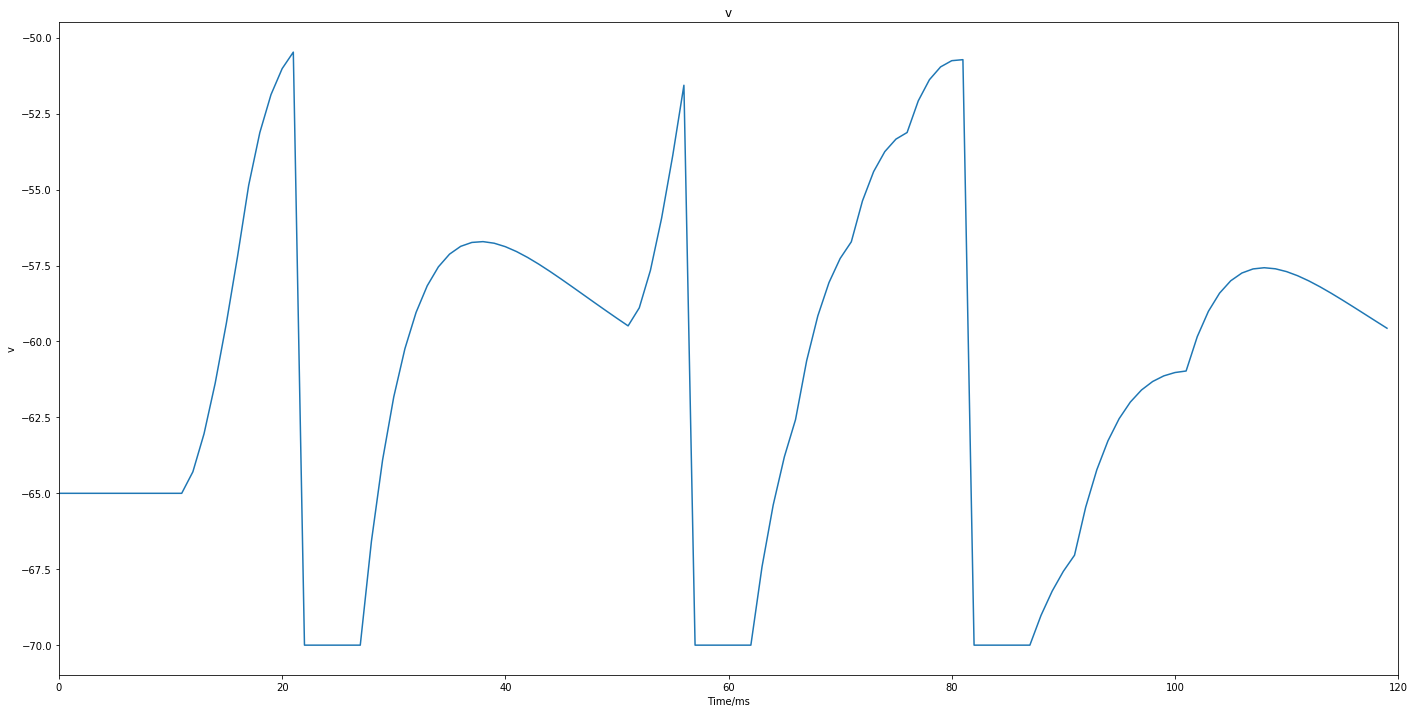

In [64]:

ticks = len(v) / nNeurons
f, ax1 = pylab.subplots(1, 1, figsize=(24, 12))
ax1.set_xlim((0, simtime))

#     v_for_neuron = target_v[ticks: 1 * ticks]
ax1.plot([i[2] for i in v])
ax1.set_xlabel('Time/ms')
ax1.set_ylabel('v')
ax1.set_title('v')

In [27]:
%%capture
import pylab
import numpy as np
# import spynnaker_extra_pynn_models as extra_sim
%matplotlib inline
from spynnaker.pyNN.models.neural_properties.synapse_dynamics.synapse_dynamics import SynapseDynamics

try:
    import pyNN.spiNNaker as p
except Exception as e:
    import spynnaker7.pyNN as p


p.setup(timestep=1., min_delay=1.0, max_delay=12)
nNeurons = 1  # number of neurons in each population
simtime = 320
t_record = 10


cell_params_lif = {'cm': 2.5,
                   'i_offset': 0.0,
                   'tau_m': 20.0,
                   'tau_refrac': 2.0,
                   'tau_syn_E': 5.0,
                   'tau_syn_I': 5.0,
                   'v_reset': -70.0,
                   'v_rest': -65.0,
                   'v_thresh': -50.0
                   }

weight_to_spike = .2
delay = 1
st = [10, 11, 12, 13, 14, 15, 20, 50, 51, 52, 53, 54, 55, 56, 60, 70, 80, 90, 100, 110, 120, 130, 140,
     150,160,170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]
spikeArray = {'spike_times': st}#np.linspace(10, simtime, 20)}



target_pop = p.Population(nNeurons, p.IF_cond_exp, cell_params_lif,
                   label='target_pop')
source_pop= p.Population(1, p.SpikeSourceArray,
                            spikeArray, label="spike source")
# stdp_model2 = p.STDPMechanism(
#             timing_dependence=extra_sim.PfisterSpikeTriplet(
#                 tau_plus=16.8, tau_minus=33.7, tau_x=101, tau_y=114),
#             weight_dependence=extra_sim.WeightDependenceAdditiveTriplet(
#                 w_min=0.0, w_max=1.0, A_plus=param_scale * 0.0,
#                 A_minus=param_scale * 7.1e-3,
#                 A3_plus=param_scale * 6.5e-3, A3_minus=param_scale * 0.0)
#         )

w_max = .2
stdp_model = p.STDPMechanism(
timing_dependence=p.SpikePairRule(tau_minus=20, tau_plus=20),
weight_dependence=p.AdditiveWeightDependence(w_min=0, w_max=w_max, A_minus=.02, A_plus=.02)
)

lat_projection= p.Projection(target_pop, target_pop, p.OneToOneConnector(weight_to_spike, 1),
                                   synapse_dynamics=p.SynapseDynamics(slow=stdp_model))
ff_projection = p.Projection(source_pop, target_pop, p.OneToOneConnector(weight_to_spike, 1),
                               synapse_dynamics=p.SynapseDynamics(slow=stdp_model))
pre_weights = []
post_weights = []

target_pop.record_v()
target_pop.record() #Spikes

for run in range(simtime//t_record):
    p.run(t_record)
    pre_weights.append(np.array(ff_projection._get_synaptic_data(False, 'weight')))
    post_weights.append(np.array(lat_projection._get_synaptic_data(False, 'weight')))

v = target_pop.get_v(compatible_output=True)
spikes = target_pop.getSpikes(compatible_output=True)
p.end()
pre_weights=np.asarray(pre_weights).ravel()
post_weight=np.asarray(post_weights).ravel()

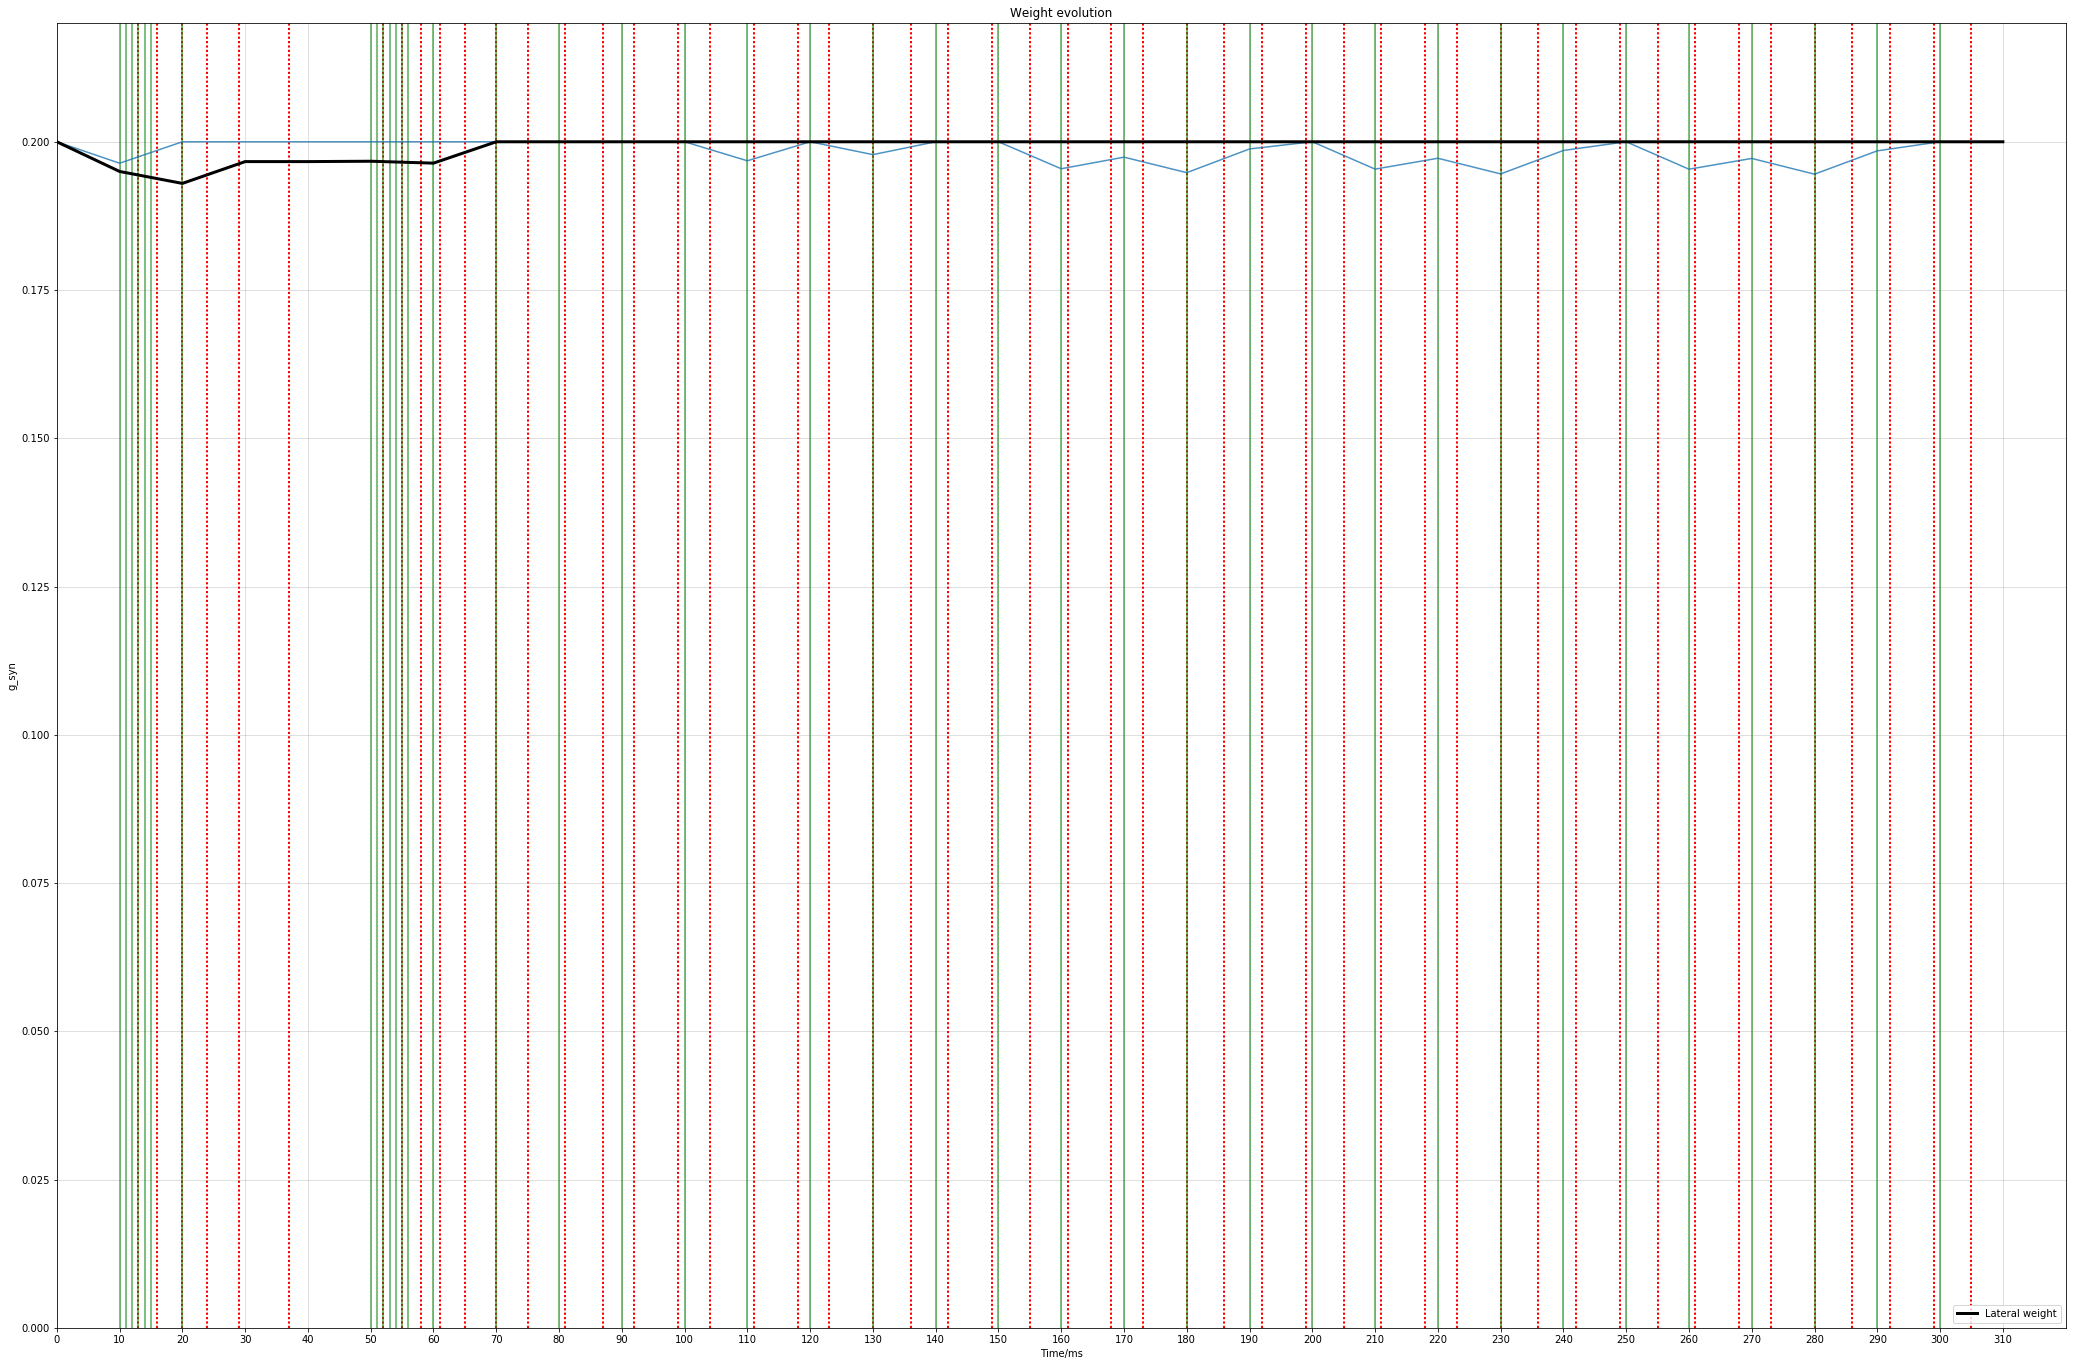

In [28]:
f, ax1 = pylab.subplots(1, 1, figsize=(36, 24))
ax1.set_xlim((0, simtime))
ax1.set_ylim([0, 1.1 * w_max])
for time in [i[1] for i in spikes]:
    pylab.axvline(time, c='r',ls=':', lw=2)
for time in st:
    pylab.axvline(time, c='g',ls='-', lw=2, alpha=.5)
# for time in [i[1] for i in source_spikes]:
#     plt.axvline(time, c='g', ls=':', lw=1)
for i in range(nNeurons):
    ax1.plot(np.arange(pre_weights.shape[0]) * t_record, pre_weights.flatten(), alpha=.8)

ax1.grid(visible=True)
ax1.plot(np.arange(post_weight.shape[0]) * t_record, post_weight.ravel(), label='Lateral weight', c='k', lw=3)
ax1.legend(loc='lower right')
ax1.set_xlabel('Time/ms')
ax1.set_ylabel('g_syn')
ax1.set_title("Weight evolution")
major_ticks = np.arange(0, simtime, t_record) 
ax1.set_xticks(major_ticks)
ax1.grid(which='major', alpha=0.5)  

In [29]:
%%capture
import pylab
import numpy as np
# import spynnaker_extra_pynn_models as extra_sim
%matplotlib inline
from spynnaker.pyNN.models.neural_properties.synapse_dynamics.synapse_dynamics import SynapseDynamics

try:
    import pyNN.spiNNaker as p
except Exception as e:
    import spynnaker7.pyNN as p


p.setup(timestep=1., min_delay=1.0, max_delay=12)
nNeurons = 1  # number of neurons in each population
simtime = 320
t_record = 10


cell_params_lif = {'cm': 2.,
                   'i_offset': 0.0,
                   'tau_m': 20.0,
                   'tau_refrac': 2.0,
                   'tau_syn_E': 3.0,
                   'tau_syn_I': 5.0,
                   'v_reset': -70.0,
                   'v_rest': -65.0,
                   'v_thresh': -50.0
                   }

weight_to_spike = .35
delay = 1
st = [10, 40, 70, 100, 130, 160, 190, 220, 250, 280]
spikeArray = {'spike_times': st}#np.linspace(10, simtime, 20)}



target_pop = p.Population(nNeurons, p.IF_cond_exp, cell_params_lif,
                   label='target_pop')
source_pop= p.Population(1, p.SpikeSourceArray,
                            spikeArray, label="spike source")
# stdp_model2 = p.STDPMechanism(
#             timing_dependence=extra_sim.PfisterSpikeTriplet(
#                 tau_plus=16.8, tau_minus=33.7, tau_x=101, tau_y=114),
#             weight_dependence=extra_sim.WeightDependenceAdditiveTriplet(
#                 w_min=0.0, w_max=1.0, A_plus=param_scale * 0.0,
#                 A_minus=param_scale * 7.1e-3,
#                 A3_plus=param_scale * 6.5e-3, A3_minus=param_scale * 0.0)
#         )

w_max = weight_to_spike
stdp_model = p.STDPMechanism(
timing_dependence=p.SpikePairRule(tau_minus=20, tau_plus=20),
weight_dependence=p.AdditiveWeightDependence(w_min=0, w_max=w_max, A_minus=.1, A_plus=.02)
)

lat_projection= p.Projection(target_pop, target_pop, p.OneToOneConnector(weight_to_spike, 1),
                                   synapse_dynamics=p.SynapseDynamics(slow=stdp_model))
ff_projection = p.Projection(source_pop, target_pop, p.OneToOneConnector(weight_to_spike, 1),
                               synapse_dynamics=p.SynapseDynamics(slow=stdp_model))
pre_weights = []
post_weights = []

target_pop.record_v()
target_pop.record() #Spikes
target_pop.record_gsyn()

for run in range(simtime//t_record):
    p.run(t_record)
    pre_weights.append(np.array(ff_projection._get_synaptic_data(False, 'weight')))
    post_weights.append(np.array(lat_projection._get_synaptic_data(False, 'weight')))

v = target_pop.get_v(compatible_output=True)
spikes = target_pop.getSpikes(compatible_output=True)
gsyn = target_pop.get_gsyn(compatible_output=True)

p.end()
pre_weights=np.asarray(pre_weights).ravel()
post_weight=np.asarray(post_weights).ravel()

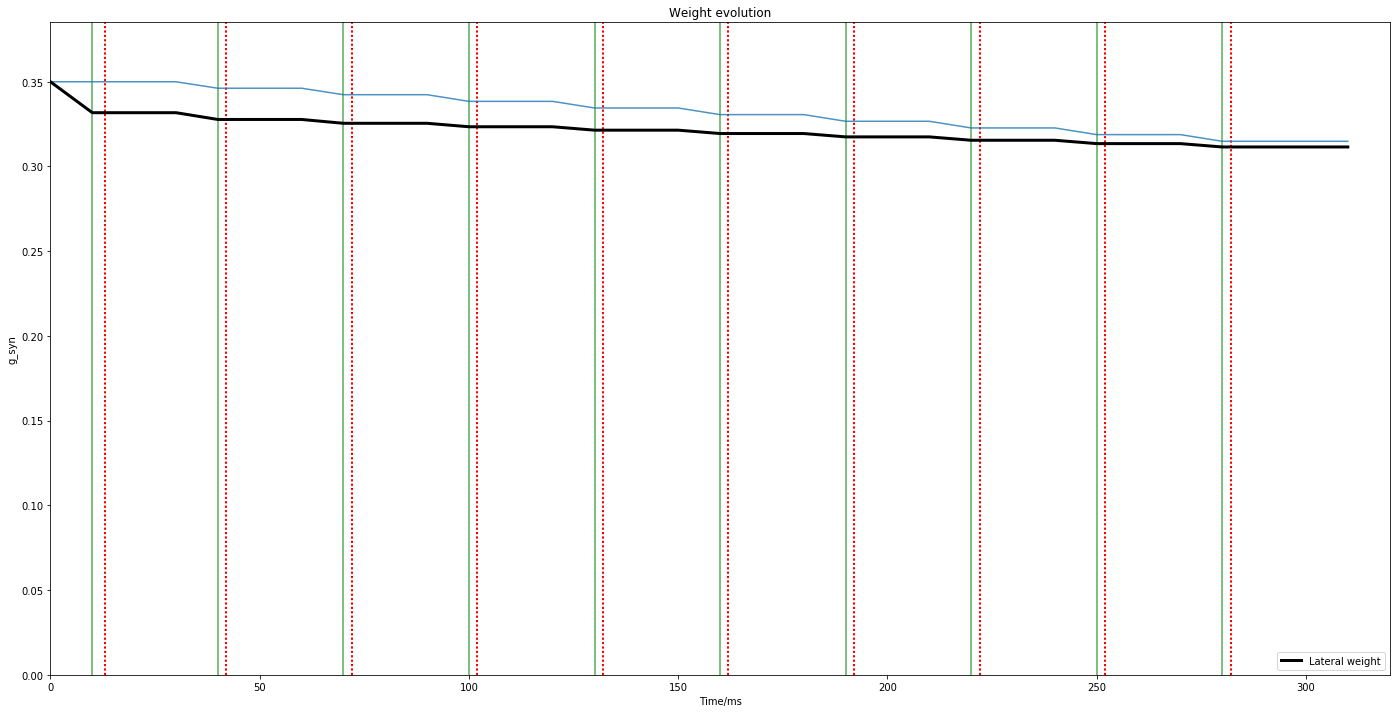

In [30]:
f, ax1 = pylab.subplots(1, 1, figsize=(24, 12))
ax1.set_xlim((0, simtime))
ax1.set_ylim([0, 1.1 * w_max])
for time in [i[1] for i in spikes]:
    pylab.axvline(time, c='r',ls=':', lw=2)
for time in st:
    pylab.axvline(time, c='g',ls='-', lw=2, alpha=.5)
# for time in [i[1] for i in source_spikes]:
#     plt.axvline(time, c='g', ls=':', lw=1)
for i in range(nNeurons):
    ax1.plot(np.arange(pre_weights.shape[0]) * t_record, pre_weights.flatten(), alpha=.8)

ax1.plot(np.arange(post_weight.shape[0]) * t_record, post_weight.ravel(), label='Lateral weight', c='k', lw=3)
ax1.legend(loc='lower right')
ax1.set_xlabel('Time/ms')
ax1.set_ylabel('g_syn')
ax1.set_title("Weight evolution")

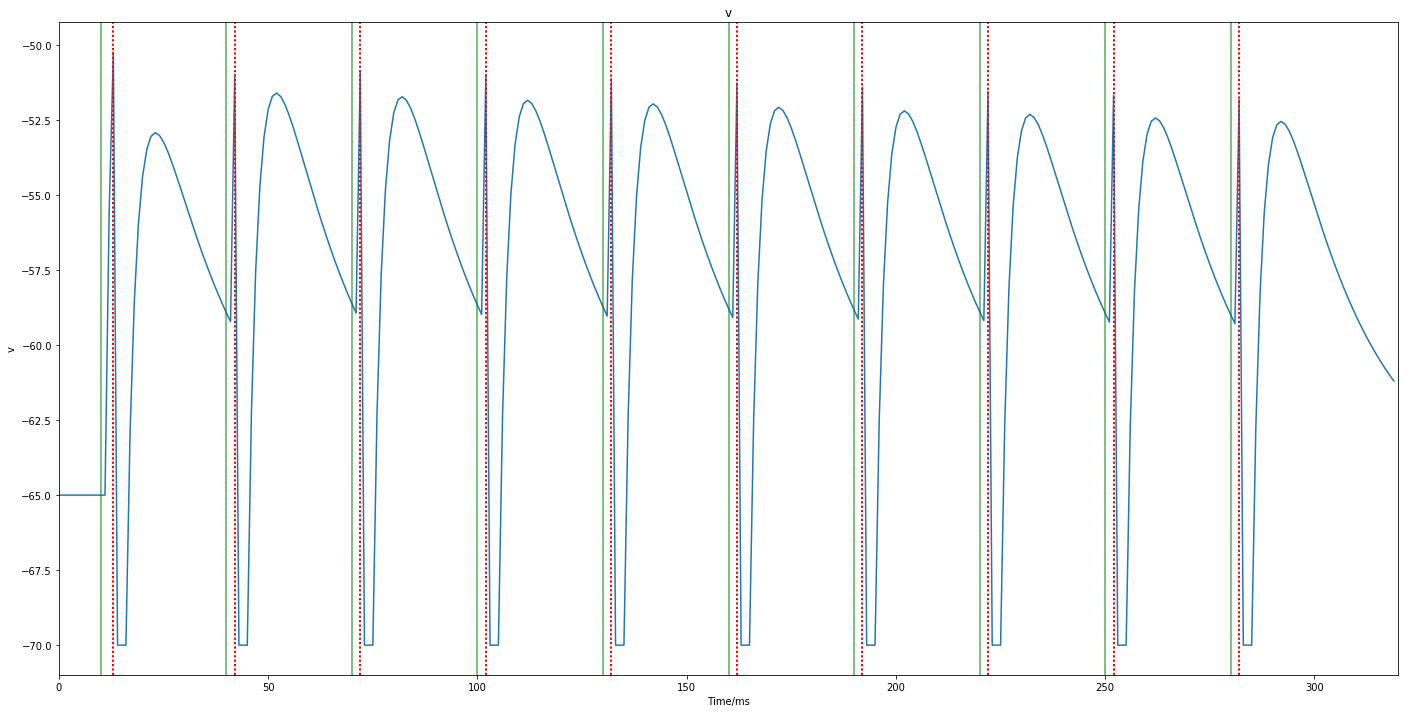

In [31]:
ticks = len(v) / nNeurons
f, ax1 = pylab.subplots(1, 1, figsize=(24, 12))
ax1.set_xlim((0, simtime))

#     v_for_neuron = target_v[ticks: 1 * ticks]
ax1.plot([i[2] for i in v])
ax1.set_xlabel('Time/ms')
ax1.set_ylabel('v')
ax1.set_title('v')
for time in [i[1] for i in spikes]:
    pylab.axvline(time, c='r',ls=':', lw=2)
for time in st:
    pylab.axvline(time, c='g',ls='-', lw=2, alpha=.5)

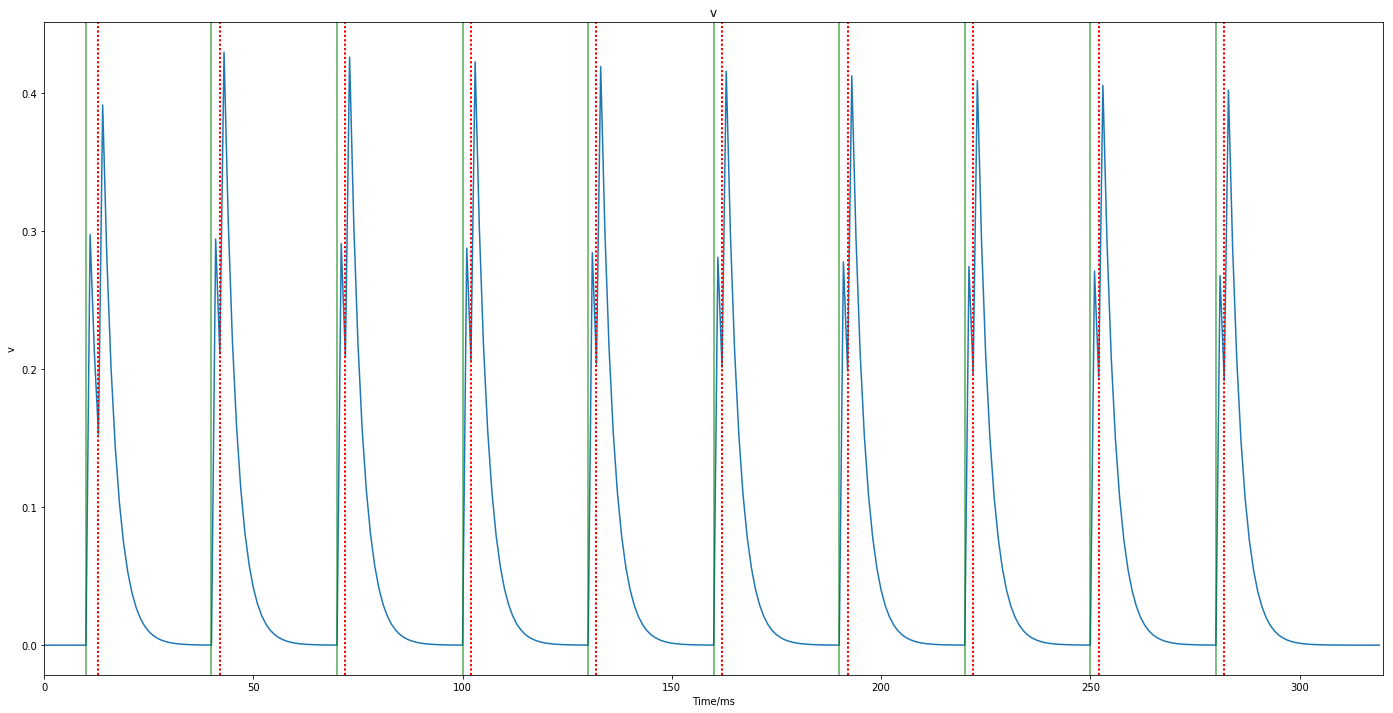

In [32]:

ticks = len(v) / nNeurons
f, ax1 = pylab.subplots(1, 1, figsize=(24, 12))
ax1.set_xlim((0, simtime))

#     v_for_neuron = target_v[ticks: 1 * ticks]
ax1.plot([i[2] for i in gsyn])
ax1.set_xlabel('Time/ms')
ax1.set_ylabel('v')
ax1.set_title('v')
for time in [i[1] for i in spikes]:
    pylab.axvline(time, c='r',ls=':', lw=2)
for time in st:
    pylab.axvline(time, c='g',ls='-', lw=2, alpha=.5)

In [64]:
%%capture
import pylab
import numpy as np
# import spynnaker_extra_pynn_models as extra_sim
%matplotlib inline
from spynnaker.pyNN.models.neural_properties.synapse_dynamics.synapse_dynamics import SynapseDynamics

try:
    import pyNN.spiNNaker as p
except Exception as e:
    import spynnaker7.pyNN as p


p.setup(timestep=1., min_delay=1.0, max_delay=12)
nNeurons = 1  # number of neurons in each population
simtime = 520
t_record = 10


cell_params_lif = {'cm': .2,
                   'i_offset': 0.0,
                   'tau_m': 20.0,
                   'tau_refrac': 5.0,
                   'tau_syn_E': 5.0,
                   'tau_syn_I': 5.0,
                   'v_reset': -70.0,
                   'v_rest': -65.0,
                   'v_thresh': -50.0
                   }

weight_to_spike = 1
delay = 1
st = [10, 40, 70, 100, 130, 160, 190, 220, 250, 280, 310, 340, 370, 400, 430, 460, 490]
spikeArray = {'spike_times': st}#np.linspace(10, simtime, 20)}



target_pop = p.Population(nNeurons, p.IF_curr_exp, cell_params_lif,
                   label='target_pop')
source_pop= p.Population(1, p.SpikeSourceArray,
                            spikeArray, label="spike source")
# stdp_model2 = p.STDPMechanism(
#             timing_dependence=extra_sim.PfisterSpikeTriplet(
#                 tau_plus=16.8, tau_minus=33.7, tau_x=101, tau_y=114),
#             weight_dependence=extra_sim.WeightDependenceAdditiveTriplet(
#                 w_min=0.0, w_max=1.0, A_plus=param_scale * 0.0,
#                 A_minus=param_scale * 7.1e-3,
#                 A3_plus=param_scale * 6.5e-3, A3_minus=param_scale * 0.0)
#         )

w_max = 1.3
stdp_model = p.STDPMechanism(
timing_dependence=p.SpikePairRule(tau_minus=20, tau_plus=20),
weight_dependence=p.AdditiveWeightDependence(w_min=0, w_max=w_max, A_minus=.2, A_plus=.2)
)

lat_projection= p.Projection(target_pop, target_pop, p.OneToOneConnector(weight_to_spike, 2),
                                   synapse_dynamics=p.SynapseDynamics(slow=stdp_model))
ff_projection = p.Projection(source_pop, target_pop, p.OneToOneConnector(weight_to_spike, 1),
                               synapse_dynamics=p.SynapseDynamics(slow=stdp_model))
pre_weights = []
post_weights = []

target_pop.record_v()
target_pop.record() #Spikes
target_pop.record_gsyn()

for run in range(simtime//t_record):
    p.run(t_record)
    pre_weights.append(np.array(ff_projection._get_synaptic_data(False, 'weight')))
    post_weights.append(np.array(lat_projection._get_synaptic_data(False, 'weight')))

v = target_pop.get_v(compatible_output=True)
spikes = target_pop.getSpikes(compatible_output=True)
gsyn = target_pop.get_gsyn(compatible_output=True)

p.end()
pre_weights=np.asarray(pre_weights).ravel()
post_weight=np.asarray(post_weights).ravel()

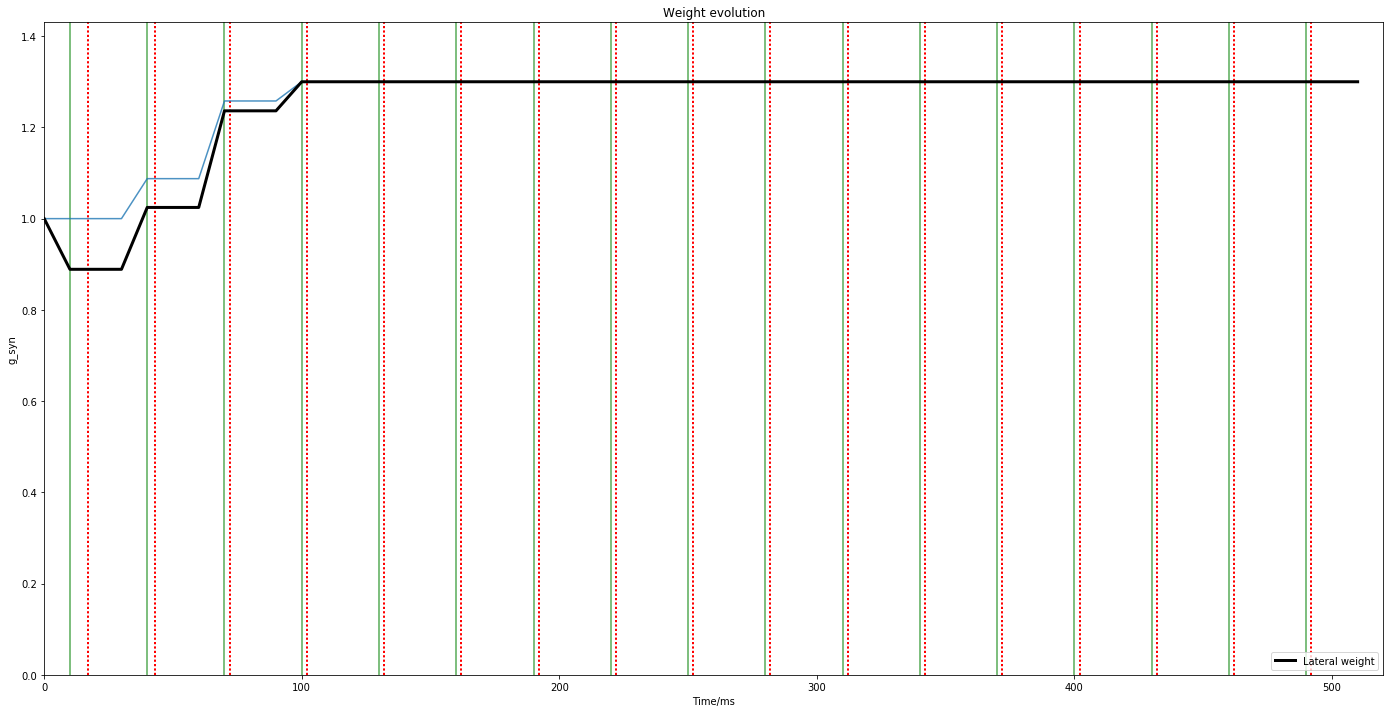

In [65]:
f, ax1 = pylab.subplots(1, 1, figsize=(24, 12))
ax1.set_xlim((0, simtime))
ax1.set_ylim([0, 1.1 * w_max])
for time in [i[1] for i in spikes]:
    pylab.axvline(time, c='r',ls=':', lw=2)
for time in st:
    pylab.axvline(time, c='g',ls='-', lw=2, alpha=.5)
# for time in [i[1] for i in source_spikes]:
#     plt.axvline(time, c='g', ls=':', lw=1)
for i in range(nNeurons):
    ax1.plot(np.arange(pre_weights.shape[0]) * t_record, pre_weights.flatten(), alpha=.8)

ax1.plot(np.arange(post_weight.shape[0]) * t_record, post_weight.ravel(), label='Lateral weight', c='k', lw=3)
ax1.legend(loc='lower right')
ax1.set_xlabel('Time/ms')
ax1.set_ylabel('g_syn')
ax1.set_title("Weight evolution")

In [66]:
[i[1] for i in spikes]

[17.0,
 43.0,
 72.0,
 102.0,
 132.0,
 162.0,
 192.0,
 222.0,
 252.0,
 282.0,
 312.0,
 342.0,
 372.0,
 402.0,
 432.0,
 462.0,
 492.0]

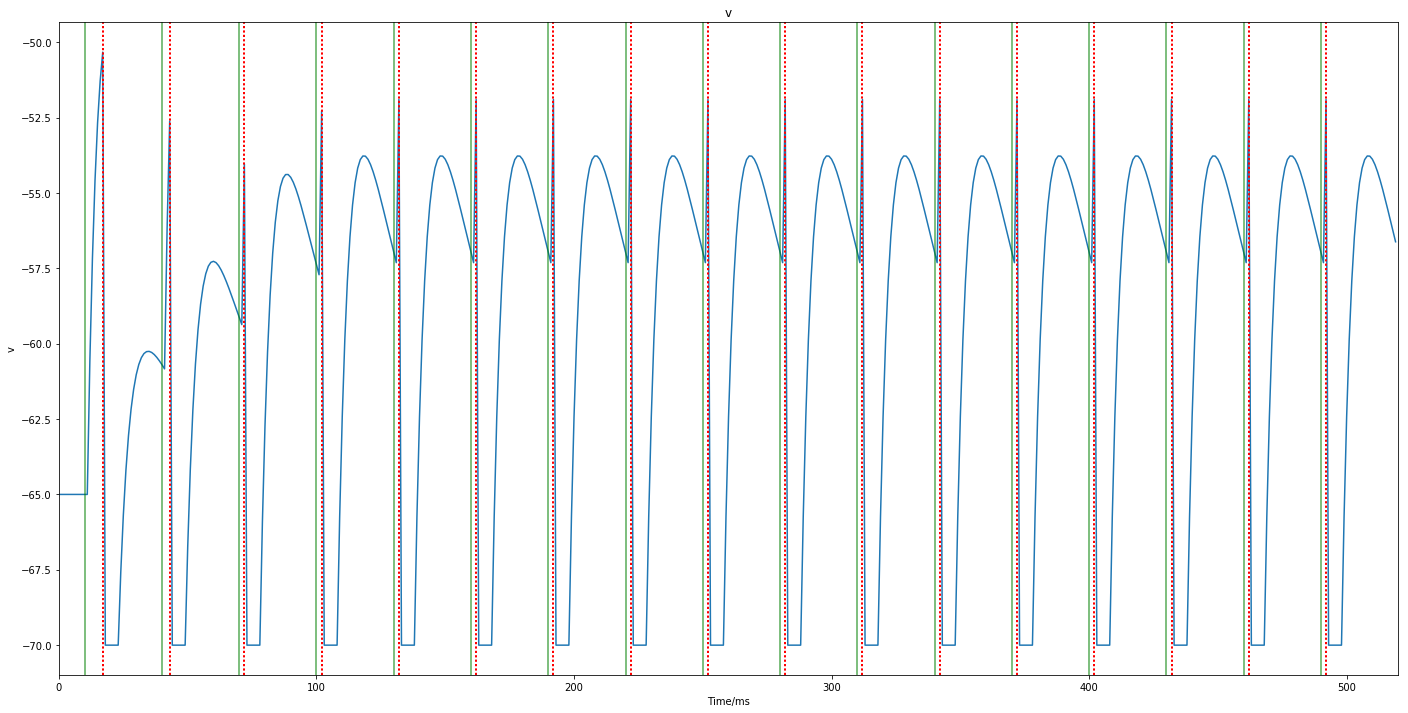

In [56]:
ticks = len(v) / nNeurons
f, ax1 = pylab.subplots(1, 1, figsize=(24, 12))
ax1.set_xlim((0, simtime))

#     v_for_neuron = target_v[ticks: 1 * ticks]
ax1.plot([i[2] for i in v])
ax1.set_xlabel('Time/ms')
ax1.set_ylabel('v')
ax1.set_title('v')
for time in [i[1] for i in spikes]:
    pylab.axvline(time, c='r',ls=':', lw=2)
for time in st:
    pylab.axvline(time, c='g',ls='-', lw=2, alpha=.5)

In [57]:
actual_w_max_on_spinnaker = 10650

In [59]:
actual_w_max_on_spinnaker / 2.**15

0.32501220703125

In [70]:
%%capture
import pylab
import numpy as np
# import spynnaker_extra_pynn_models as extra_sim
%matplotlib inline
from spynnaker.pyNN.models.neural_properties.synapse_dynamics.synapse_dynamics import SynapseDynamics

try:
    import pyNN.spiNNaker as p
except Exception as e:
    import spynnaker7.pyNN as p


p.setup(timestep=1., min_delay=1.0, max_delay=12)
nNeurons = 1  # number of neurons in each population
simtime = 320
t_record = 5


cell_params_lif = {'cm': .2,
                   'i_offset': 0.0,
                   'tau_m': 20.0,
                   'tau_refrac': 2.0,
                   'tau_syn_E': 5.0,
                   'tau_syn_I': 5.0,
                   'v_reset': -70.0,
                   'v_rest': -65.0,
                   'v_thresh': -50.0
                   }

weight_to_spike = 1
delay = 1
st = [10, 40, 70, 100, 130, 160, 190, 220, 250, 280]
spikeArray = {'spike_times': st}#np.linspace(10, simtime, 20)}



target_pop = p.Population(nNeurons, p.IF_curr_exp, cell_params_lif,
                   label='target_pop')
source_pop= p.Population(1, p.SpikeSourceArray,
                            spikeArray, label="spike source")
# stdp_model2 = p.STDPMechanism(
#             timing_dependence=extra_sim.PfisterSpikeTriplet(
#                 tau_plus=16.8, tau_minus=33.7, tau_x=101, tau_y=114),
#             weight_dependence=extra_sim.WeightDependenceAdditiveTriplet(
#                 w_min=0.0, w_max=1.0, A_plus=param_scale * 0.0,
#                 A_minus=param_scale * 7.1e-3,
#                 A3_plus=param_scale * 6.5e-3, A3_minus=param_scale * 0.0)
#         )

w_max = 4
stdp_model = p.STDPMechanism(
timing_dependence=p.SpikePairRule(tau_minus=64, tau_plus=20),
weight_dependence=p.AdditiveWeightDependence(w_min=0, w_max=w_max, A_minus=.1, A_plus=.02)
)

# lat_projection= p.Projection(target_pop, target_pop, p.OneToOneConnector(weight_to_spike, delay),
#                                    synapse_dynamics=p.SynapseDynamics(slow=stdp_model))
ff_projection = p.Projection(source_pop, target_pop, p.OneToOneConnector(weight_to_spike, 1),
                               synapse_dynamics=p.SynapseDynamics(slow=stdp_model))
pre_weights = []
post_weights = []

target_pop.record_v()
target_pop.record() #Spikes
target_pop.record_gsyn()

for run in range(simtime//t_record):
    p.run(t_record)
    pre_weights.append(np.array(ff_projection._get_synaptic_data(False, 'weight')))
#     post_weights.append(np.array(lat_projection._get_synaptic_data(False, 'weight')))

v = target_pop.get_v(compatible_output=True)
spikes = target_pop.getSpikes(compatible_output=True)
gsyn = target_pop.get_gsyn(compatible_output=True)

p.end()
pre_weights=np.asarray(pre_weights).ravel()
post_weight=np.asarray([]).ravel()

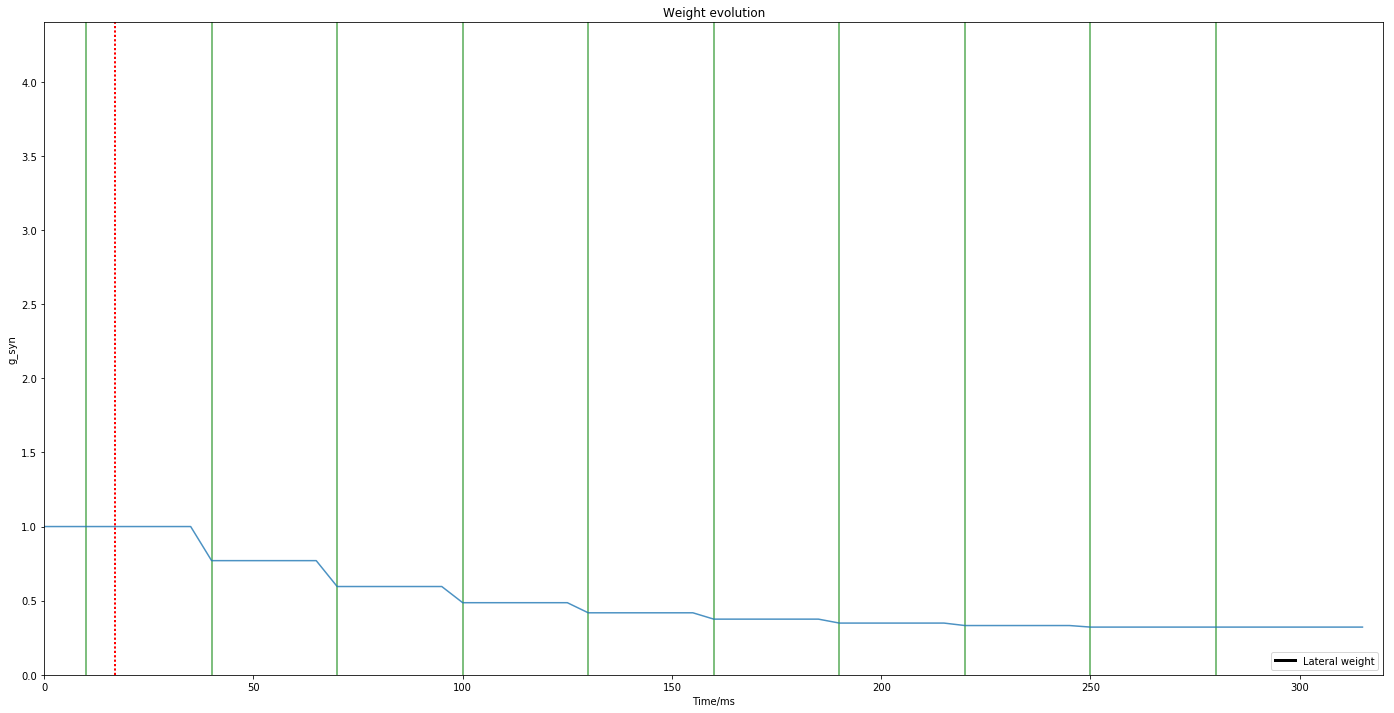

In [74]:
f, ax1 = pylab.subplots(1, 1, figsize=(24, 12))
ax1.set_xlim((0, simtime))
ax1.set_ylim([0, 1.1 * w_max])
for time in [i[1] for i in spikes]:
    pylab.axvline(time, c='r',ls=':', lw=2)
for time in st:
    pylab.axvline(time, c='g',ls='-', lw=2, alpha=.5)
# for time in [i[1] for i in source_spikes]:
#     plt.axvline(time, c='g', ls=':', lw=1)
for i in range(nNeurons):
    ax1.plot(np.arange(pre_weights.shape[0]) * t_record, pre_weights.flatten(), alpha=.8)

ax1.plot(np.arange(post_weight.shape[0]) * t_record, post_weight.ravel(), label='Lateral weight', c='k', lw=3)
ax1.legend(loc='lower right')
ax1.set_xlabel('Time/ms')
ax1.set_ylabel('g_syn')
ax1.set_title("Weight evolution")

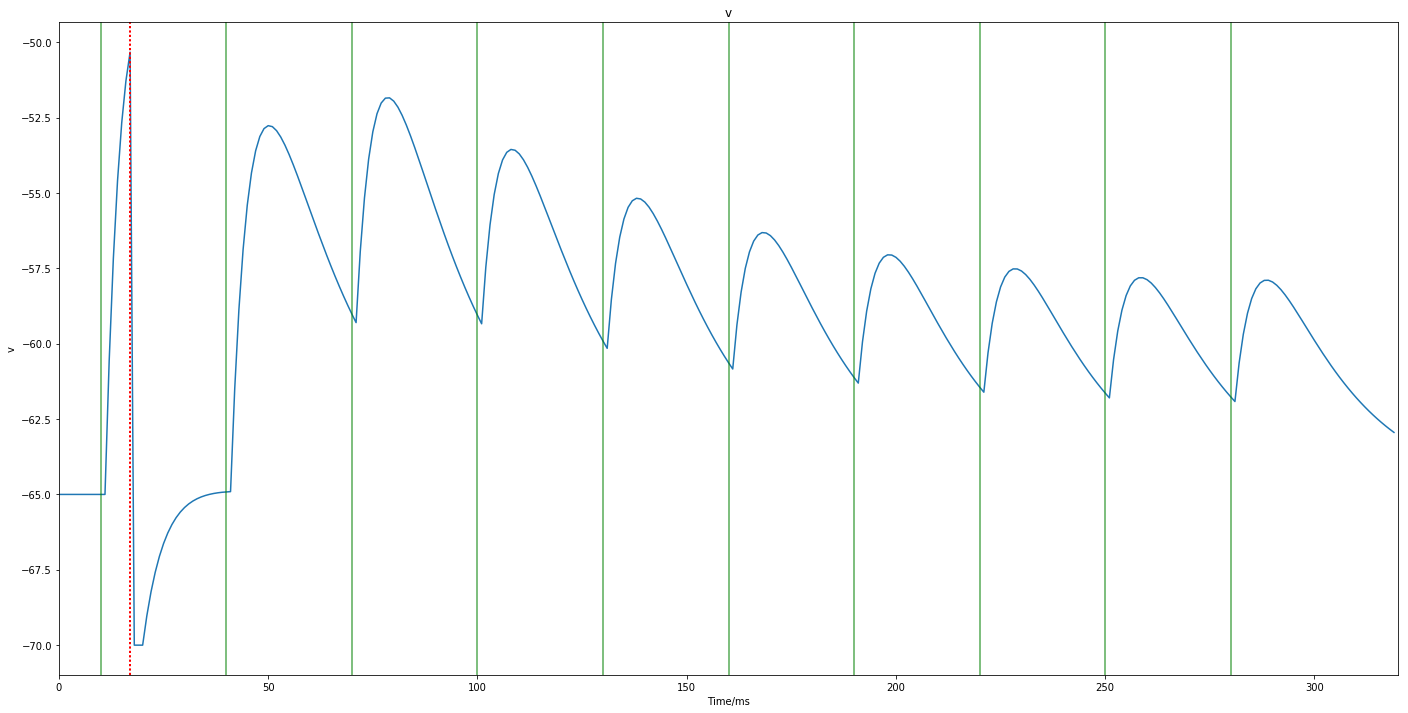

In [72]:
ticks = len(v) / nNeurons
f, ax1 = pylab.subplots(1, 1, figsize=(24, 12))
ax1.set_xlim((0, simtime))

#     v_for_neuron = target_v[ticks: 1 * ticks]
ax1.plot([i[2] for i in v])
ax1.set_xlabel('Time/ms')
ax1.set_ylabel('v')
ax1.set_title('v')
for time in [i[1] for i in spikes]:
    pylab.axvline(time, c='r',ls=':', lw=2)
for time in st:
    pylab.axvline(time, c='g',ls='-', lw=2, alpha=.5)

In [92]:
%%capture
import pylab
import numpy as np
# import spynnaker_extra_pynn_models as extra_sim
%matplotlib inline
from spynnaker.pyNN.models.neural_properties.synapse_dynamics.synapse_dynamics import SynapseDynamics

try:
    import pyNN.spiNNaker as p
except Exception as e:
    import spynnaker7.pyNN as p


p.setup(timestep=1., min_delay=1.0, max_delay=12)
nNeurons = 1  # number of neurons in each population
simtime = 520
t_record = 10


cell_params_lif = {'cm': .2,
                   'i_offset': 0.0,
                   'tau_m': 20.0,
                   'tau_refrac': 5.0,
                   'tau_syn_E': 5.0,
                   'tau_syn_I': 5.0,
                   'v_reset': -70.0,
                   'v_rest': -65.0,
                   'v_thresh': -50.0
                   }

weight_to_spike = 1
delay = 1
st = [10, 40, 70, 100, 130, 160, 190, 220, 250, 280, 310, 340, 370, 400, 430, 460, 490]
spikeArray = {'spike_times': st}#np.linspace(10, simtime, 20)}



target_pop = p.Population(nNeurons, p.IF_curr_exp, cell_params_lif,
                   label='target_pop')
source_pop= p.Population(1, p.SpikeSourceArray,
                            spikeArray, label="spike source")
# stdp_model2 = p.STDPMechanism(
#             timing_dependence=extra_sim.PfisterSpikeTriplet(
#                 tau_plus=16.8, tau_minus=33.7, tau_x=101, tau_y=114),
#             weight_dependence=extra_sim.WeightDependenceAdditiveTriplet(
#                 w_min=0.0, w_max=1.0, A_plus=param_scale * 0.0,
#                 A_minus=param_scale * 7.1e-3,
#                 A3_plus=param_scale * 6.5e-3, A3_minus=param_scale * 0.0)
#         )

w_max = 1.3

a_plus = 0.1
b = 4.
tau_plus = 17.  # ms
tau_minus = 34.  # ms
a_minus = (a_plus * tau_plus * b) / tau_minus
# a_minus = .3

stdp_model = p.STDPMechanism(
timing_dependence=p.SpikePairRule(tau_minus=20, tau_plus=20),
weight_dependence=p.AdditiveWeightDependence(w_min=0, w_max=w_max, A_minus=a_minus, A_plus=a_plus)
)

lat_projection= p.Projection(target_pop, target_pop, p.OneToOneConnector(weight_to_spike, 1),
                                   synapse_dynamics=p.SynapseDynamics(slow=stdp_model))
ff_projection = p.Projection(source_pop, target_pop, p.OneToOneConnector(weight_to_spike, 1))
pre_weights = []
post_weights = []

target_pop.record_v()
target_pop.record() #Spikes
target_pop.record_gsyn()

for run in range(simtime//t_record):
    p.run(t_record)
    pre_weights.append(np.array(ff_projection._get_synaptic_data(False, 'weight')))
    post_weights.append(np.array(lat_projection._get_synaptic_data(False, 'weight')))

v = target_pop.get_v(compatible_output=True)
spikes = target_pop.getSpikes(compatible_output=True)
gsyn = target_pop.get_gsyn(compatible_output=True)

p.end()
pre_weights=np.asarray(pre_weights).ravel()
post_weight=np.asarray(post_weights).ravel()

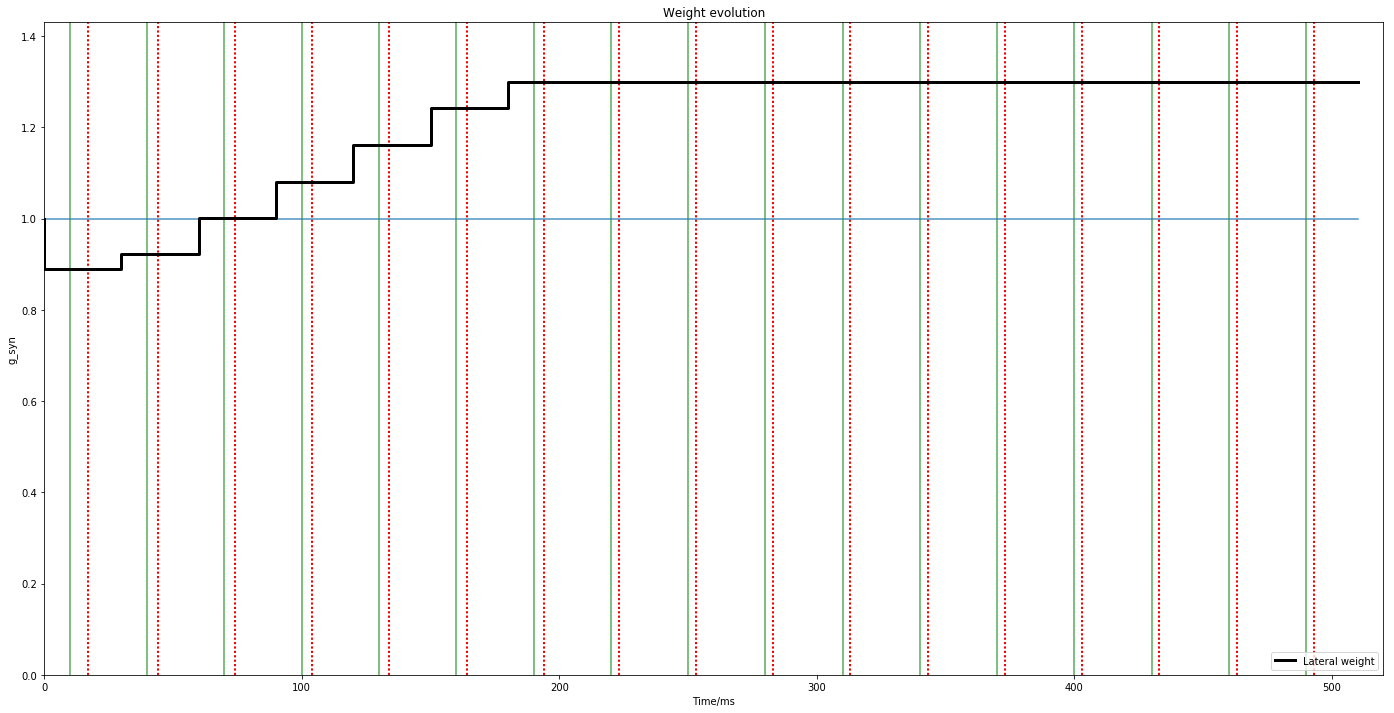

In [93]:
f, ax1 = pylab.subplots(1, 1, figsize=(24, 12))
ax1.set_xlim((0, simtime))
ax1.set_ylim([0, 1.1 * w_max])
for time in [i[1] for i in spikes]:
    pylab.axvline(time, c='r',ls=':', lw=2)
for time in st:
    pylab.axvline(time, c='g',ls='-', lw=2, alpha=.5)
# for time in [i[1] for i in source_spikes]:
#     plt.axvline(time, c='g', ls=':', lw=1)
for i in range(nNeurons):
    ax1.step(np.arange(pre_weights.shape[0]) * t_record, pre_weights.flatten(), alpha=.8)

ax1.step(np.arange(post_weight.shape[0]) * t_record, post_weight.ravel(), label='Lateral weight', c='k', lw=3)
ax1.legend(loc='lower right')
ax1.set_xlabel('Time/ms')
ax1.set_ylabel('g_syn')
ax1.set_title("Weight evolution")